## 2.3 Data exploration

Exploratory data analysis (EDA) is an important step in a project and most people spend 80% of time on it, investigation the  dataset in order to discover insight, anomalies,test hypothesis and to check the assumptions made at the beginning of the project with the help of visualisation and summary statistics. 

Looking at the stocks, you notice that all the companies are not trading at the same price and you have to do normalisation

#### Exploring the Open Price

In [65]:
import numpy as np
import pandas as pd
# For time stamps
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-KG3679B5\SQLEXPRESS;'
                      'Database=StockDB;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

openPrice_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Open] FROM [StockDB].[dbo].[Stock_Details]',conn)
openPrice_query.head(1)

FullDate StockSymbol  S_Open
0  2012-08-03        AAPL   21.92

In [2]:
openPrice_query.tail(1)

FullDate StockSymbol  S_Open
31855  2020-07-02           V   196.0

In [3]:
df_open = openPrice_query.set_index('FullDate')
df_open.head(2)

StockSymbol     S_Open
FullDate                         
2012-08-03        AAPL  21.920000
2012-08-06        AAPL  22.049999

Reranging by changing 'StockSymbol' as the column

In [5]:
stock_tickers_open = df_open.pivot(columns='StockSymbol')
stock_tickers_open.columns = [col[1] for col in stock_tickers_open.columns]
stock_tickers_open.head(3)

AAPL        AMZN         BA         FB     GE        GOOG  \
FullDate                                                                     
2012-08-03  21.920000  234.029999  73.129997  20.360001  20.02  318.809998   
2012-08-06  22.049999  235.559998  73.209999  21.389999  20.16  318.609985   
2012-08-07  22.240000  234.130005  73.269997  22.200001  20.33  319.700012   

                   HD          J        JPM       MSFT  NFLX   OPK         PG  \
FullDate                                                                        
2012-08-03  52.200001  39.189999  35.820000  29.530001  7.84  4.15  64.709999   
2012-08-06  52.410000  39.160000  36.240002  30.000000  7.79  4.28  65.230003   
2012-08-07  52.250000  39.360001  36.570000  30.070000  8.14  4.29  65.919998   

            TSLA        UNH          V  
FullDate                                
2012-08-03  5.38  51.380001  32.590000  
2012-08-06  5.51  51.860001  32.750000  
2012-08-07  5.75  51.380001  32.709999

In [6]:
#looking for any duplicate values
stock_tickers_open.duplicated().sum()

0

In [7]:
stock_tickers_open.describe()

AAPL         AMZN           BA           FB           GE  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean     35.384812   936.454767   198.408579   117.623707    20.607730   
std      16.248864   653.464796   103.065299    58.908555     7.412135   
min      13.860000   221.309998    69.339996    18.080000     5.610000   
25%      23.775001   339.050003   127.584999    72.430000    12.865000   
50%      30.000000   743.400024   145.210007   118.389999    23.309999   
75%      44.015001  1615.479980   322.525009   172.000000    26.110001   
max      91.959999  2912.010010   446.010010   241.279999    31.690001   

              GOOG           HD            J          JPM         MSFT  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean    807.761099   138.363878    58.819503    79.223586    73.232567   
std     310.923606    53.161507    15.038603    26.258168    42.161424   
min     318.100006    52.130001    34.910000    35.820000    26.379999   
25%     539.220001    82.029999    47.285000    57.725000    41.700001   
50%     757.450012   132.330002    56.410000    67.419998    56.150002   
75%    1086.350037   184.279999    65.849998   104.695000   101.634998   
max    1525.069946   257.450012   102.000000   139.899994   205.679993   

              NFLX          OPK           PG         TSLA          UNH  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean    164.419628     7.028388    87.782451    51.804048   157.762275   
std     128.045989     3.701722    14.397236    31.107016    77.356756   
min       7.710000     1.200000    64.709999     5.380000    51.250000   
25%      59.435001     3.770000    79.084999    39.629999    82.539997   
50%     112.129997     7.180000    83.279999    47.480000   138.160004   
75%     294.360001     9.405000    90.985001    61.795000   235.340004   
max     485.640015    18.600000   127.190002   244.300003   309.899994   

                 V  
count  1991.000000  
mean     95.303099  
std      47.397564  
min      31.650000  
25%      54.654999  
50%      79.239998  
75%     134.019997  
max     212.520004

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Open Price'}, xlabel='FullDate'>

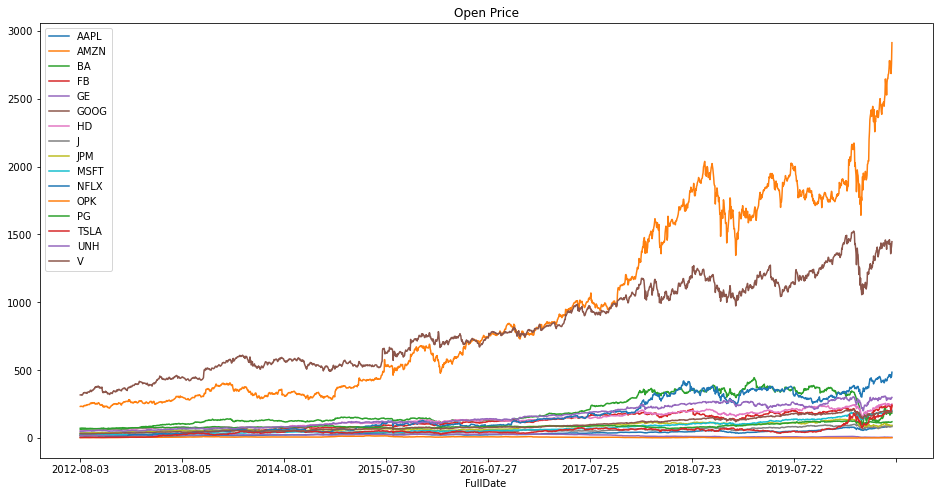

In [8]:
stock_tickers_open.plot(figsize=(16,8),title='Open Price')

#### Exploring the Volume

In [27]:
volume_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Volume] FROM [StockDB].[dbo].[Stock_Details]',conn)
volume_query.head(1)

FullDate StockSymbol     S_Volume
0  2012-08-03        AAPL  344920800.0

In [11]:
df_volume = volume_query.set_index('FullDate')
df_volume.head(3)

StockSymbol     S_Volume
FullDate                           
2012-08-03        AAPL  344920800.0
2012-08-06        AAPL  302103200.0
2012-08-07        AAPL  290446784.0

In [15]:
stock_tickers_volume =df_volume.pivot(columns='StockSymbol')
stock_tickers_volume.columns = [col[1] for col in stock_tickers_volume.columns]
stock_tickers_volume.head(3)

AAPL       AMZN         BA          FB          GE  \
FullDate                                                                
2012-08-03  344920800.0  2825300.0  4588500.0  80647000.0  39407100.0   
2012-08-06  302103200.0  1843700.0  3758800.0  27778900.0  35525800.0   
2012-08-07  290446784.0  2058300.0  4717200.0  36782900.0  32359900.0   

                 GOOG         HD         J         JPM        MSFT  \
FullDate                                                             
2012-08-03  3808300.0  7484300.0  884100.0  24516300.0  35859400.0   
2012-08-06  3578000.0  7471600.0  677900.0  18979200.0  27471800.0   
2012-08-07  3978300.0  6519100.0  881000.0  37225800.0  28002900.0   

                  NFLX       OPK          PG        TSLA        UNH  \
FullDate                                                              
2012-08-03  37295300.0  814100.0  15279100.0   6047500.0  6408000.0   
2012-08-06  28527800.0  858000.0  10034400.0   7641000.0  4982600.0   
2012-08-07  30769900.0  722500.0  10463300.0  11936000.0  6590800.0   

                     V  
FullDate                
2012-08-03  12934400.0  
2012-08-06   9227600.0  
2012-08-07  13179200.0

In [16]:
#looking for any duplicate values
stock_tickers_volume.duplicated().sum()

0

In [17]:
stock_tickers_volume.describe()

AAPL          AMZN            BA            FB            GE  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   2.105742e+08  4.030573e+06  6.169462e+06  3.239203e+07  5.619432e+07   
std    1.576971e+08  2.237308e+06  9.410982e+06  2.649643e+07  4.317309e+07   
min    4.544800e+07  8.813000e+05  7.889000e+05  5.913100e+06  1.368790e+07   
25%    1.076472e+08  2.650450e+06  2.991600e+06  1.621535e+07  3.119115e+07   
50%    1.581260e+08  3.422300e+06  3.944400e+06  2.379550e+07  4.176640e+07   
75%    2.589802e+08  4.666500e+06  5.309900e+06  3.886840e+07  6.545630e+07   
max    1.460852e+09  2.385610e+07  1.032128e+08  3.654579e+08  4.485859e+08   

               GOOG            HD             J           JPM          MSFT  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   2.321509e+06  5.518861e+06  1.043876e+06  1.660246e+07  3.400331e+07   
std    1.740959e+06  2.479753e+06  5.283364e+05  7.236238e+06  1.861326e+07   
min    7.900000e+03  1.517100e+06  1.946000e+05  3.324300e+06  7.425600e+06   
25%    1.301250e+06  3.829950e+06  6.895500e+05  1.163350e+07  2.266110e+07   
50%    1.720500e+06  4.951700e+06  9.180000e+05  1.480030e+07  2.946710e+07   
75%    2.766400e+06  6.609400e+06  1.241550e+06  1.955120e+07  3.947960e+07   
max    2.497790e+07  2.279290e+07  6.154700e+06  6.088080e+07  2.484285e+08   

               NFLX           OPK            PG          TSLA           UNH  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   1.537700e+07  4.536243e+06  8.919948e+06  3.596024e+07  4.167046e+06   
std    1.415481e+07  5.453209e+06  5.860670e+06  2.793474e+07  2.211389e+06   
min    1.616300e+06  0.000000e+00  2.022100e+06  1.879000e+06  7.140000e+05   
25%    6.976750e+06  2.305350e+06  6.384400e+06  1.891350e+07  2.836850e+06   
50%    1.157130e+07  3.355800e+06  7.712100e+06  2.875350e+07  3.659000e+06   
75%    1.881840e+07  4.956350e+06  9.714500e+06  4.345050e+07  4.893550e+06   
max    1.914458e+08  1.111781e+08  1.237357e+08  3.046940e+08  2.736140e+07   

                  V  
count  1.991000e+03  
mean   9.756530e+06  
std    5.246627e+06  
min    2.188800e+06  
25%    6.660500e+06  
50%    8.575200e+06  
75%    1.147220e+07  
max    9.007360e+07

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Volume Sold'}, xlabel='FullDate'>

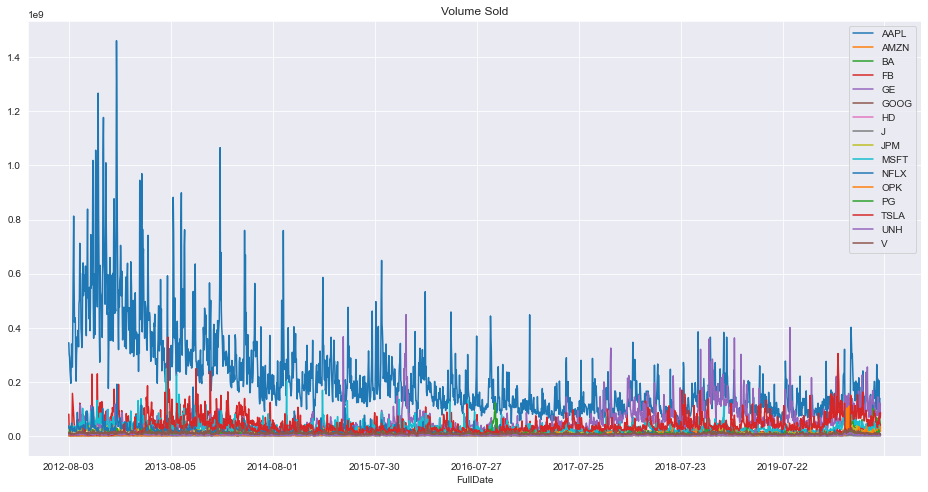

In [66]:
stock_tickers_volume.plot(figsize=(16,8),title='Volume Sold')

In [25]:
stock_tickers_volume.max()

AAPL    1.460852e+09
AMZN    2.385610e+07
BA      1.032128e+08
FB      3.654579e+08
GE      4.485859e+08
GOOG    2.497790e+07
HD      2.279290e+07
J       6.154700e+06
JPM     6.088080e+07
MSFT    2.484285e+08
NFLX    1.914458e+08
OPK     1.111781e+08
PG      1.237357e+08
TSLA    3.046940e+08
UNH     2.736140e+07
V       9.007360e+07
dtype: float64

In [26]:
stock_tickers_volume.idxmax()

AAPL    2013-01-24
AMZN    2015-01-30
BA      2020-06-11
FB      2013-07-25
GE      2015-11-17
GOOG    2012-10-18
HD      2013-02-26
J       2018-11-20
JPM     2013-03-15
MSFT    2013-07-19
NFLX    2013-01-25
OPK     2020-03-13
PG      2016-09-30
TSLA    2020-02-04
UNH     2019-04-16
V       2013-07-31
dtype: object

#### Exploring the Adjusted Close

In [28]:
adjClose_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Adj_Close] FROM [StockDB].[dbo].[Stock_Details]',conn)
adjClose_query.head(1)

FullDate StockSymbol  S_Adj_Close
0  2012-08-03        AAPL         19.0

In [30]:
df_adjClose = adjClose_query.set_index('FullDate')
df_adjClose.head(3)

StockSymbol  S_Adj_Close
FullDate                           
2012-08-03        AAPL    19.000000
2012-08-06        AAPL    19.209999
2012-08-07        AAPL    19.160000

In [31]:
stock_tickers_adjClose =df_adjClose.pivot(columns='StockSymbol')
stock_tickers_adjClose.columns = [col[1] for col in stock_tickers_adjClose.columns]
stock_tickers_adjClose.head(3)

AAPL        AMZN         BA         FB         GE  \
FullDate                                                             
2012-08-03  19.000000  234.970001  59.820000  21.090000  15.990000   
2012-08-06  19.209999  233.990005  59.880001  21.920000  16.000000   
2012-08-07  19.160000  236.559998  61.169998  20.719999  16.110001   

                  GOOG         HD          J        JPM   MSFT  NFLX   OPK  \
FullDate                                                                     
2012-08-03  319.470001  43.570000  37.639999  28.809999  24.67  7.70  4.29   
2012-08-06  320.209991  43.330002  37.980000  28.969999  24.83  8.11  4.27   
2012-08-07  319.070007  43.660000  37.959999  29.540001  25.09  8.27  4.27   

                   PG  TSLA        UNH      V  
FullDate                                       
2012-08-03  51.189999  5.45  45.049999  30.82  
2012-08-06  51.430000  5.65  44.520000  30.83  
2012-08-07  51.750000  6.05  45.860001  30.68

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Volume Sold'}, xlabel='FullDate'>

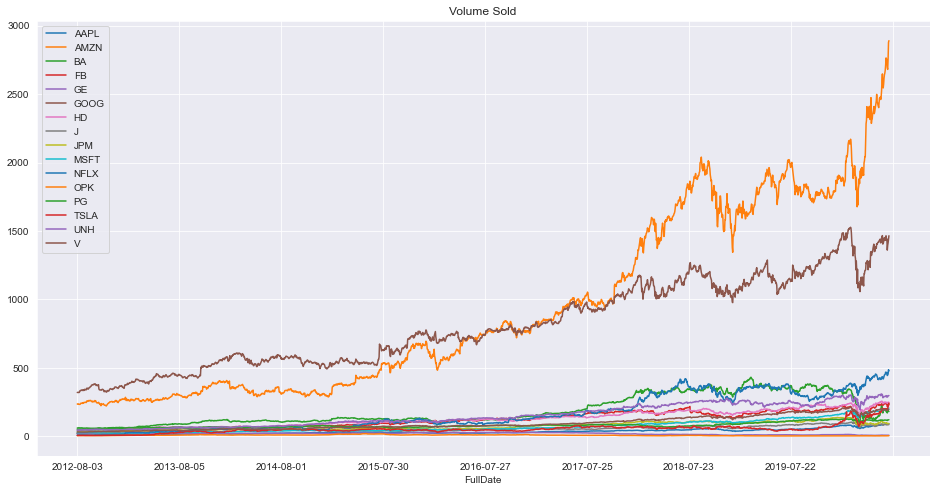

In [67]:
stock_tickers_adjClose.plot(figsize=(16,8),title='Volume Sold')

finding the daily returns

In [36]:
stocks_returns = stock_tickers_adjClose.pct_change(1).dropna()
stocks_returns

AAPL      AMZN        BA        FB        GE      GOOG  \
FullDate                                                                 
2012-08-06  0.011053 -0.004171  0.001003  0.039355  0.000625  0.002316   
2012-08-07 -0.002603  0.010983  0.021543 -0.054745  0.006875 -0.003560   
2012-08-08 -0.001566 -0.009215  0.001962  0.000000 -0.004966  0.002664   
2012-08-09  0.005750 -0.001365 -0.004242  0.013996  0.002495  0.000188   
2012-08-10  0.001559 -0.005597 -0.000983  0.038077  0.001867 -0.000563   
...              ...       ...       ...       ...       ...       ...   
2020-06-26 -0.030752 -0.022403 -0.027848 -0.083164 -0.028486 -0.056496   
2020-06-29  0.023003 -0.004638  0.143992  0.021103  0.049383  0.025789   
2020-06-30  0.008418  0.029265 -0.057535  0.029143  0.004412  0.013362   
2020-07-01 -0.001977  0.043453 -0.016257  0.046153 -0.013177  0.017282   
2020-07-02  0.000000  0.004030  0.002717 -0.017386  0.011869  0.018539   

                  HD         J       JPM      MSFT      NFLX       OPK  \
FullDate                                                                 
2012-08-06 -0.005508  0.009033  0.005554  0.006486  0.053247 -0.004662   
2012-08-07  0.007616 -0.000527  0.019676  0.010471  0.019729  0.000000   
2012-08-08  0.007558  0.007113  0.004062  0.002391 -0.001209 -0.002342   
2012-08-09  0.006820  0.001569 -0.006406  0.005567  0.001211 -0.002347   
2012-08-10 -0.001806 -0.008096  0.001357 -0.002768  0.035066  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-06-26 -0.017780 -0.013661 -0.054737 -0.020014 -0.048314  0.037313   
2020-06-29  0.021189  0.028308  0.004362  0.010722  0.008660  0.061151   
2020-06-30  0.017849 -0.000354  0.011401  0.025561  0.017440  0.155932   
2020-07-01 -0.009430 -0.010637 -0.008481  0.005862  0.067247  0.005865   
2020-07-02  0.001418  0.021025  0.003248  0.007590 -0.018017  0.032070   

                  PG      TSLA       UNH         V  
FullDate                                            
2012-08-06  0.004688  0.036697 -0.011765  0.000324  
2012-08-07  0.006222  0.070796  0.030099 -0.004865  
2012-08-08  0.007536 -0.038017  0.003707  0.005867  
2012-08-09  0.000192  0.010309 -0.013469 -0.020091  
2012-08-10  0.000575  0.018707 -0.002202  0.004299  
...              ...       ...       ...       ...  
2020-06-26 -0.022535 -0.026623 -0.031525 -0.024317  
2020-06-29  0.021046  0.051680  0.010045  0.011165  
2020-06-30  0.016250  0.069797  0.017916  0.009367  
2020-07-01  0.003451  0.036905  0.009430  0.003163  
2020-07-02  0.007465  0.079489  0.001787  0.009716  

[1990 rows x 16 columns]

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

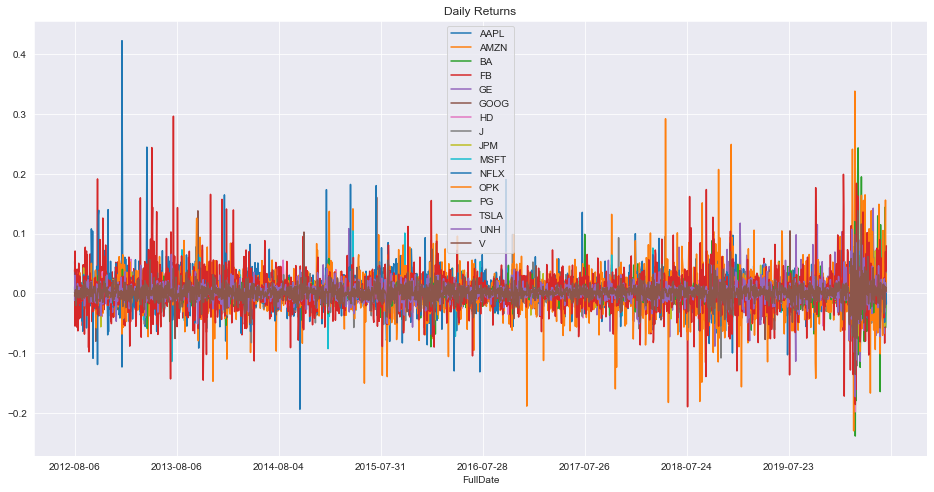

In [68]:
stocks_returns.plot(figsize=(16,8),title='Daily Returns')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

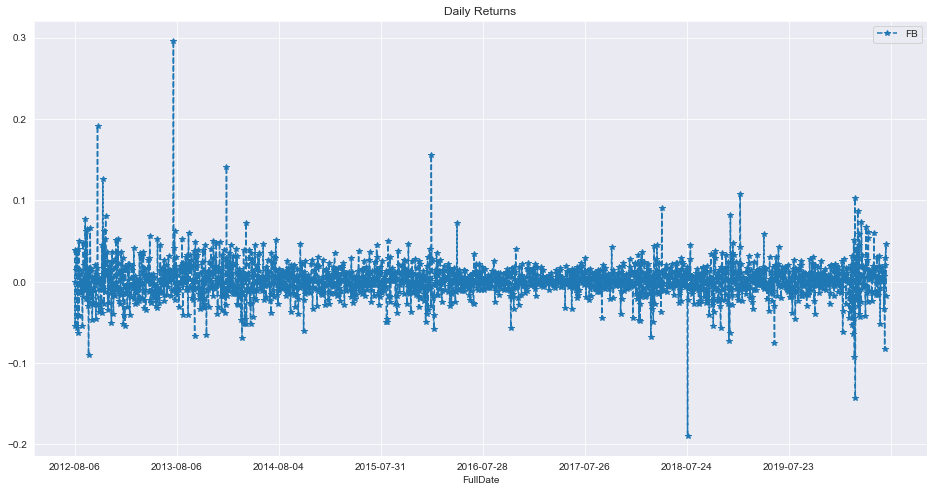

In [69]:
stocks_returns['FB'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

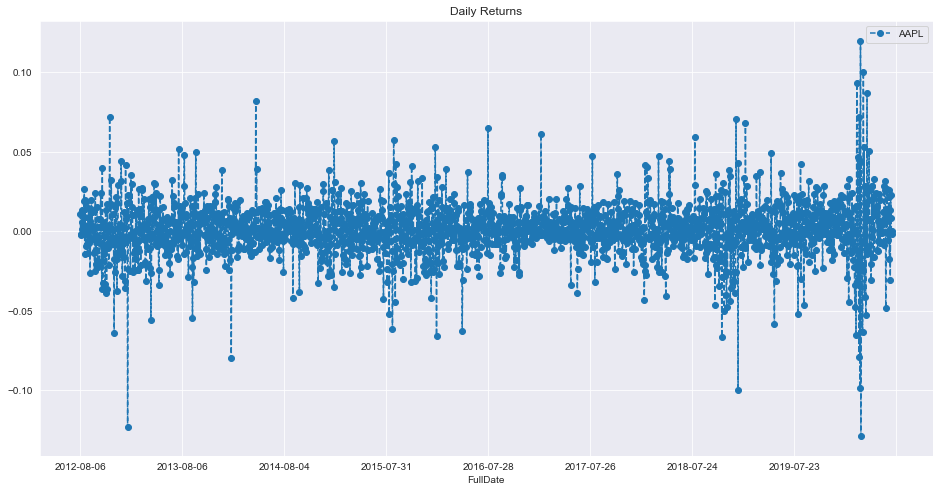

In [70]:
stocks_returns['AAPL'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='o')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

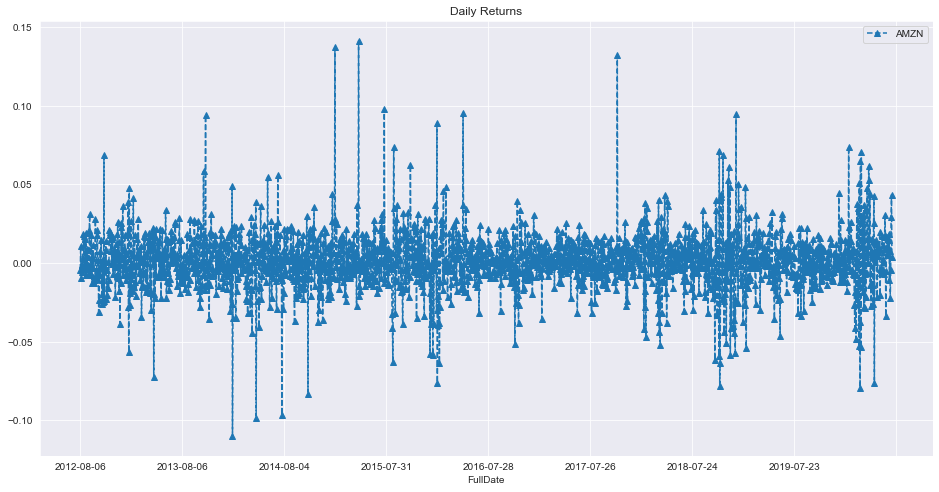

In [71]:
stocks_returns['AMZN'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='^')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

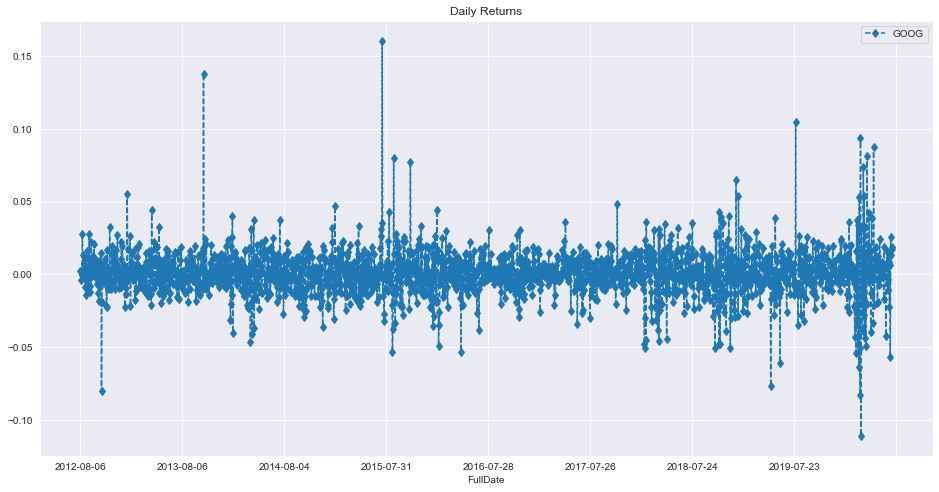

In [72]:
stocks_returns['GOOG'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='d')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

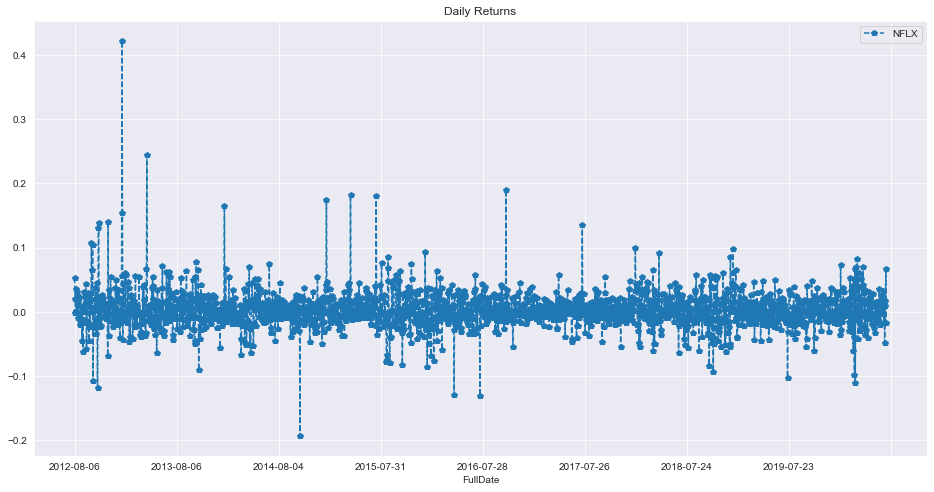

In [73]:
stocks_returns['NFLX'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='p')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

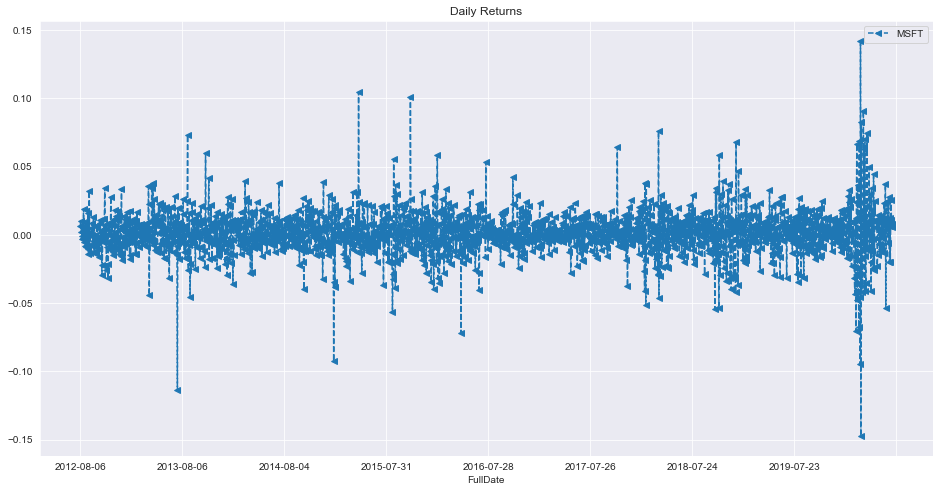

In [74]:
stocks_returns['MSFT'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='<')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

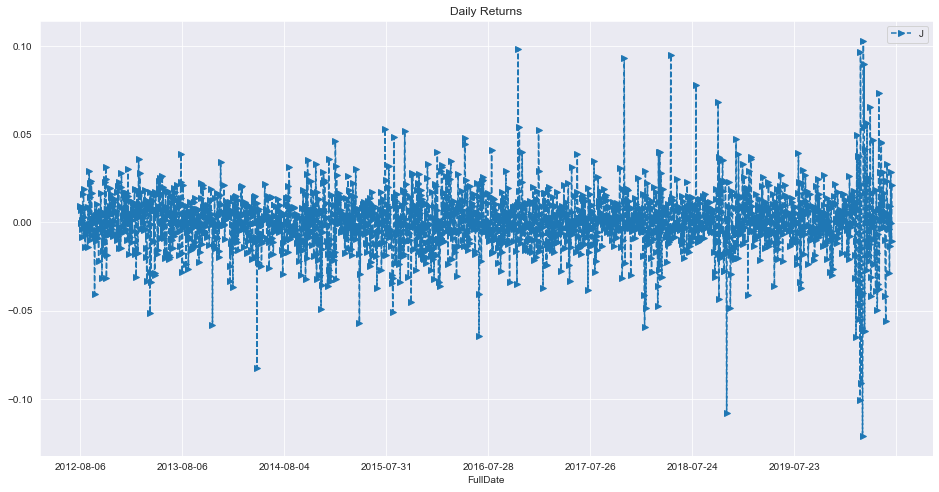

In [75]:
stocks_returns['J'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='>')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

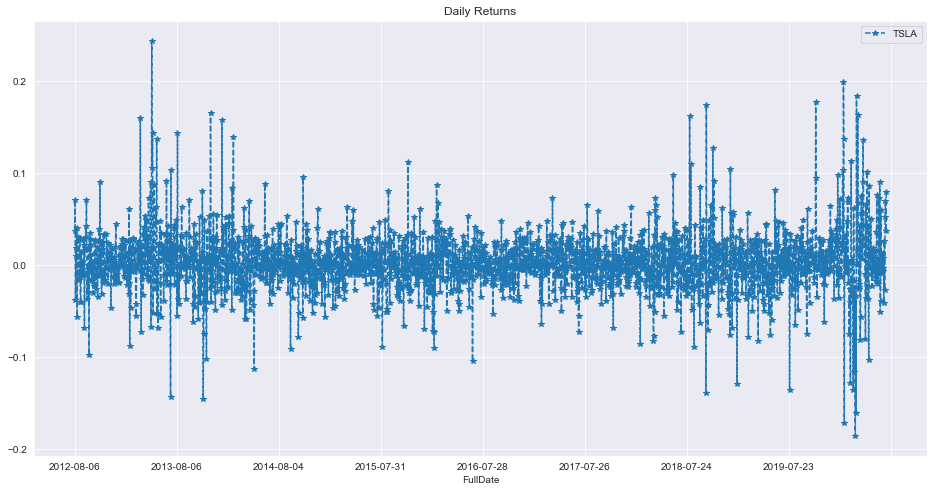

In [76]:
stocks_returns['TSLA'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

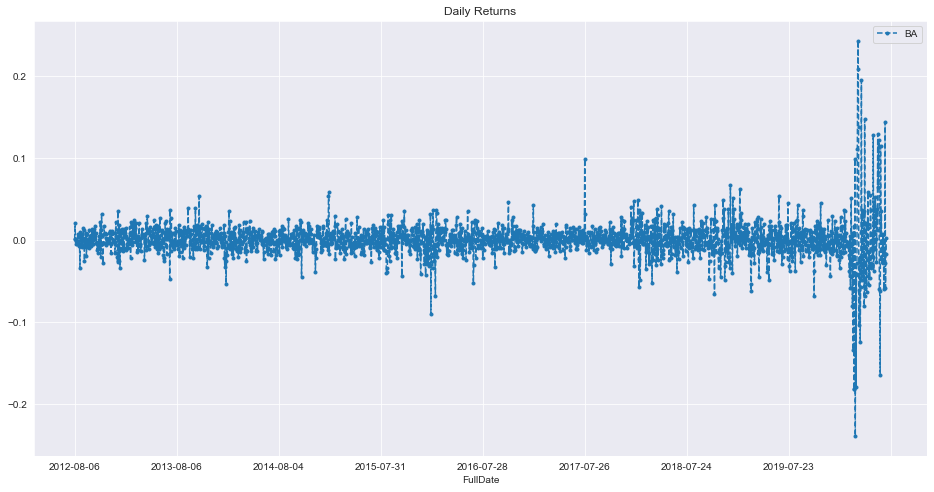

In [77]:
stocks_returns['BA'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='.')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

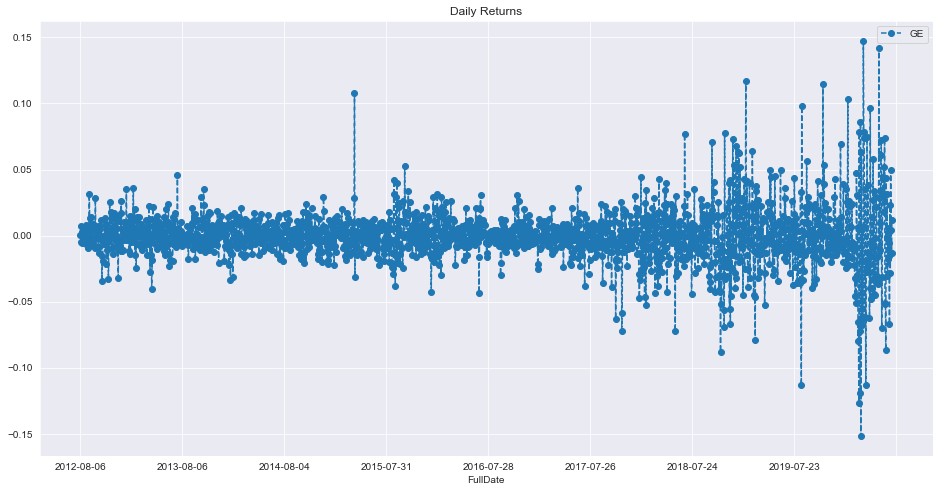

In [78]:
stocks_returns['GE'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='o')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

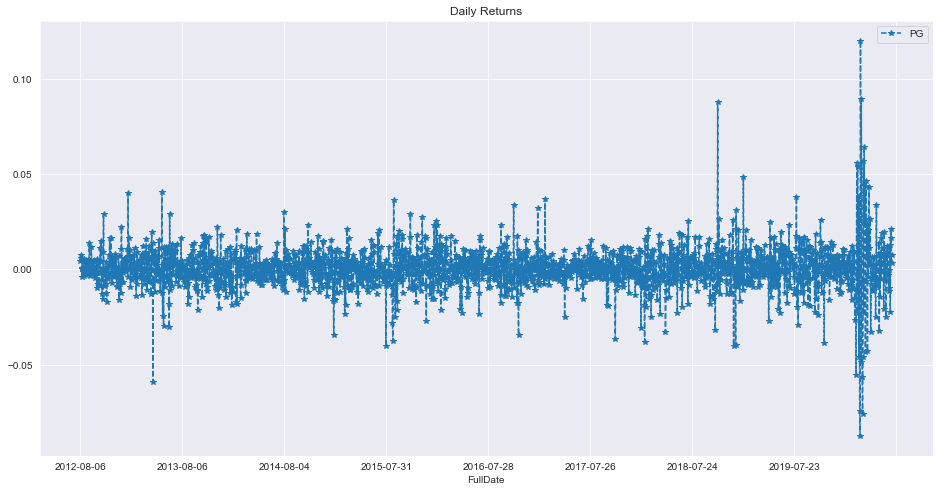

In [79]:
stocks_returns['PG'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

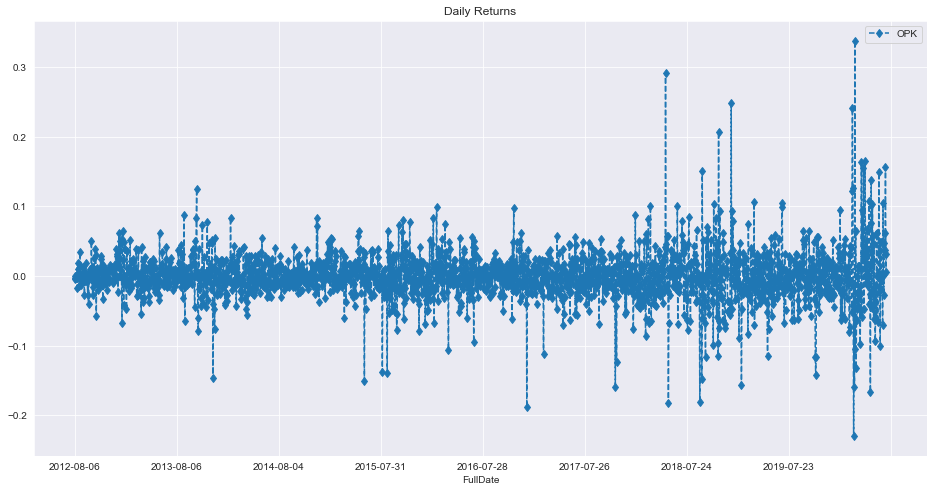

In [80]:
stocks_returns['OPK'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='d')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

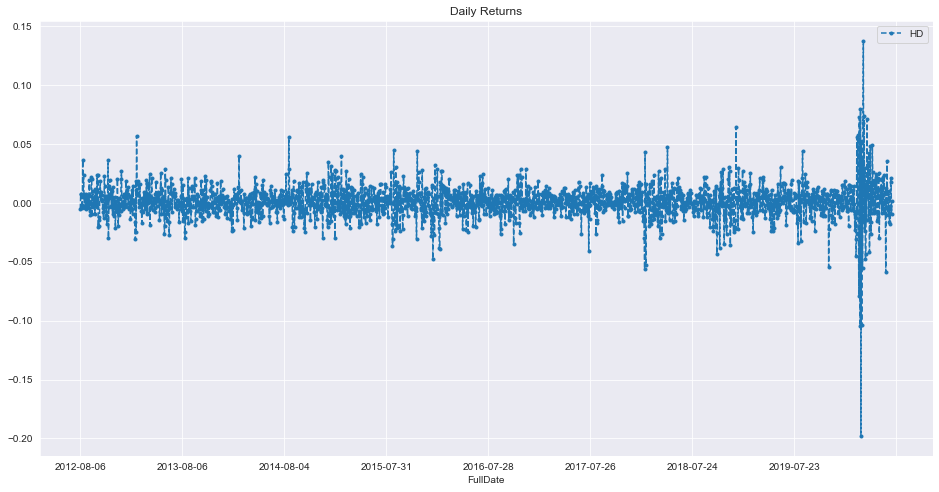

In [81]:
stocks_returns['HD'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='.')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

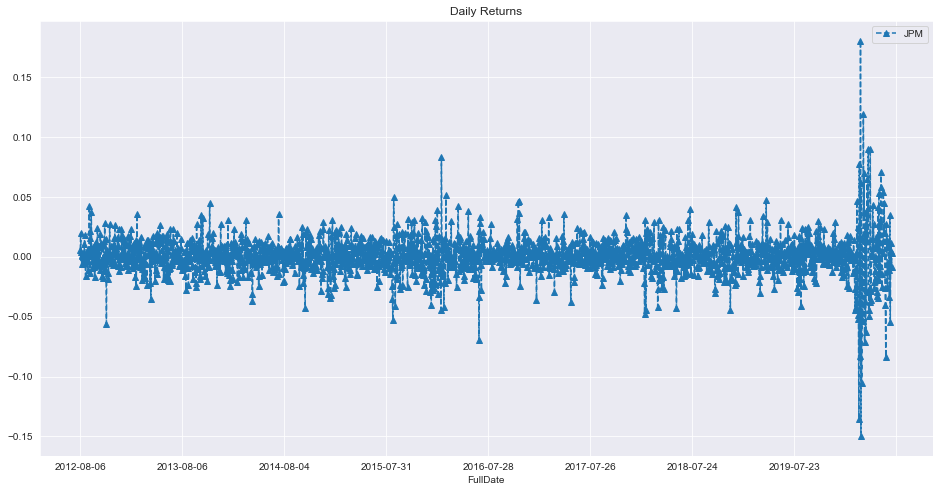

In [82]:
stocks_returns['JPM'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='^')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

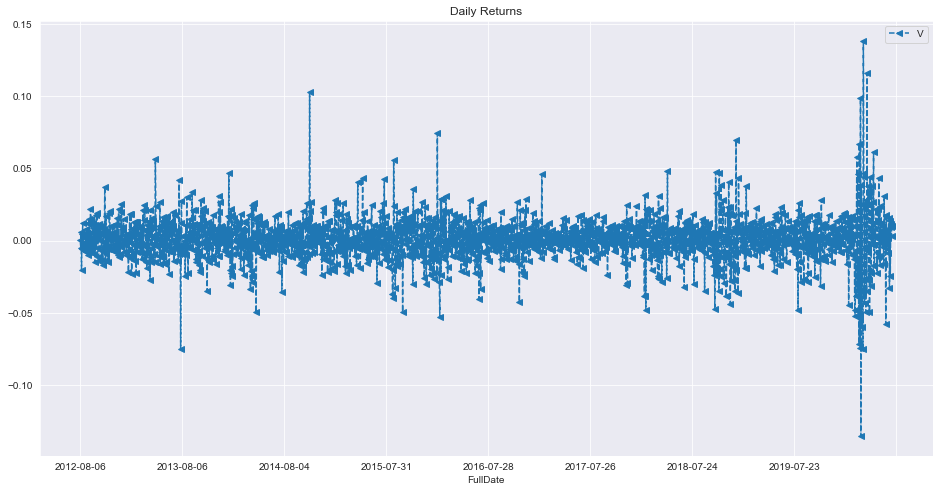

In [83]:
stocks_returns['V'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='<')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

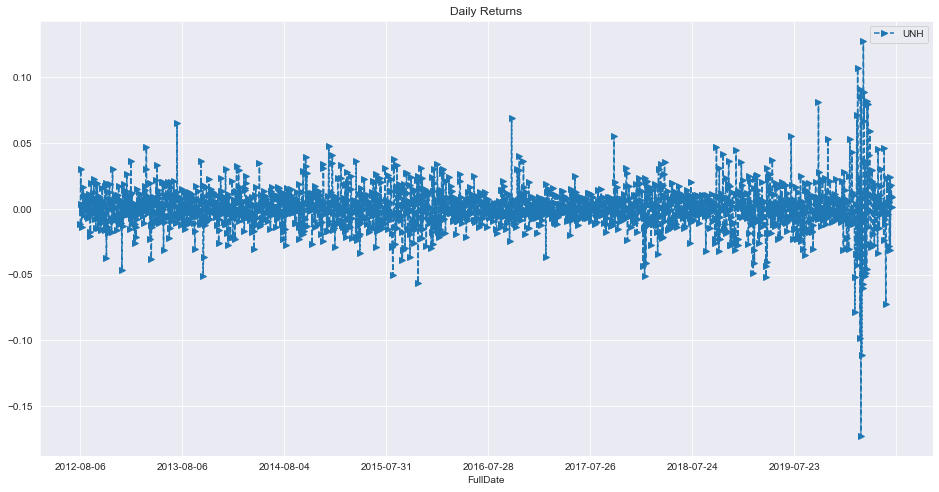

In [84]:
stocks_returns['UNH'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='>')

In [85]:
stocks_returns.max()

AAPL    0.119780
AMZN    0.141311
BA      0.243186
FB      0.296115
GE      0.147541
GOOG    0.160524
HD      0.137502
J       0.102854
JPM     0.180185
MSFT    0.142186
NFLX    0.422373
OPK     0.338028
PG      0.120064
TSLA    0.243728
UNH     0.127982
V       0.138423
dtype: float64

In [86]:
stocks_returns.idxmax()

AAPL    2020-03-13
AMZN    2015-04-24
BA      2020-03-25
FB      2013-07-25
GE      2020-03-24
GOOG    2015-07-17
HD      2020-03-24
J       2020-03-24
JPM     2020-03-13
MSFT    2020-03-13
NFLX    2013-01-24
OPK     2020-03-13
PG      2020-03-13
TSLA    2013-05-09
UNH     2020-03-24
V       2020-03-24
dtype: object

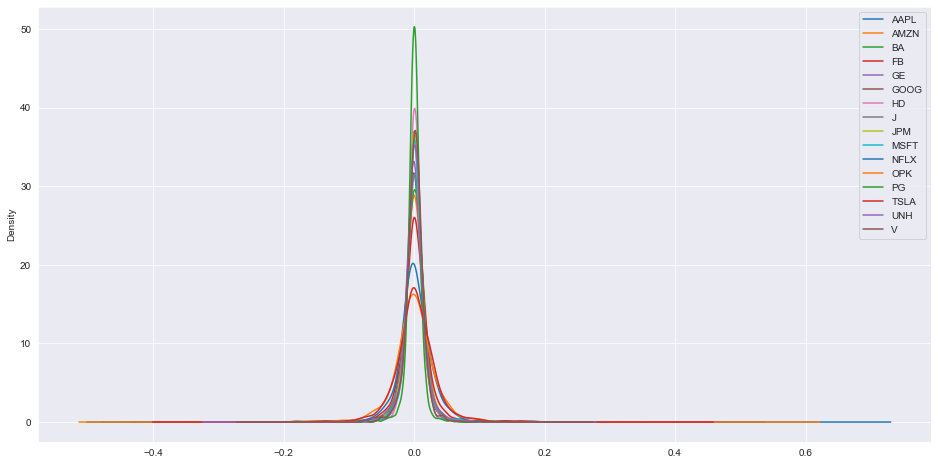

In [106]:
stocks_returns.plot(kind='kde',legend=True,figsize=(16,8))
plt.legend()

<AxesSubplot:xlabel='FB'>

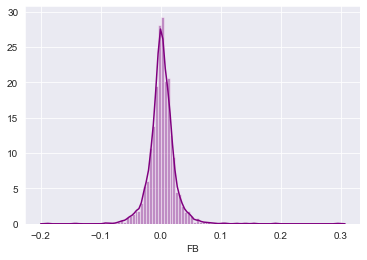

In [87]:
sns.distplot(stocks_returns['FB'].dropna(),bins=100,color='purple')

<AxesSubplot:xlabel='AAPL'>

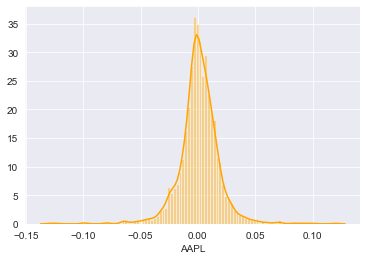

In [88]:
 #the average daily return 
sns.distplot(stocks_returns['AAPL'].dropna(),bins=100,color='orange')

<AxesSubplot:xlabel='AMZN'>

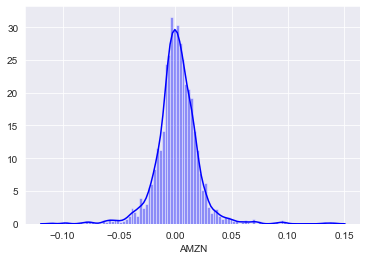

In [89]:
 #the average daily return 
sns.distplot(stocks_returns['AMZN'].dropna(),bins=100,color='blue')

<AxesSubplot:xlabel='GOOG'>

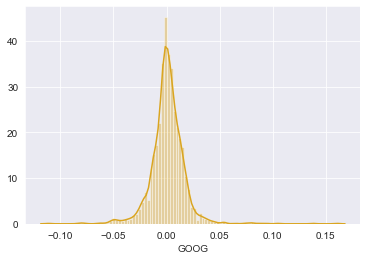

In [90]:
 #the average daily return 
sns.distplot(stocks_returns['GOOG'].dropna(),bins=100,color='goldenrod')

<AxesSubplot:xlabel='NFLX'>

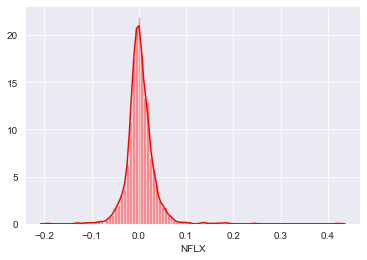

In [91]:
 #the average daily return 
sns.distplot(stocks_returns['NFLX'].dropna(),bins=100,color='red')

<AxesSubplot:xlabel='MSFT'>

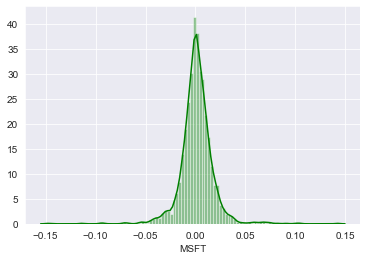

In [92]:
 #the average daily return 
sns.distplot(stocks_returns['MSFT'].dropna(),bins=100,color='green')

<AxesSubplot:xlabel='J'>

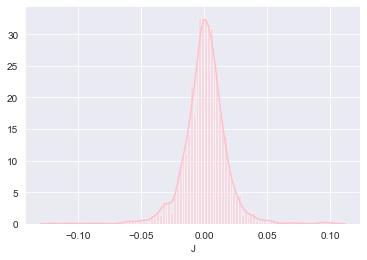

In [93]:
 #the average daily return 
sns.distplot(stocks_returns['J'].dropna(),bins=100,color='pink')

<AxesSubplot:xlabel='TSLA'>

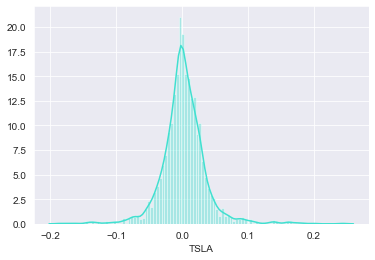

In [95]:
 #the average daily return 
sns.distplot(stocks_returns['TSLA'].dropna(),bins=100,color='turquoise')

<AxesSubplot:xlabel='GE'>

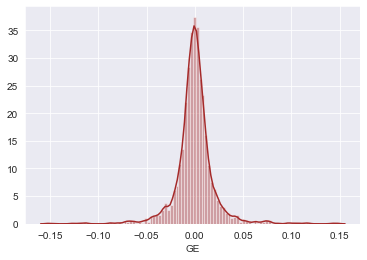

In [96]:
 #the average daily return 
sns.distplot(stocks_returns['GE'].dropna(),bins=100,color='brown')

<AxesSubplot:xlabel='BA'>

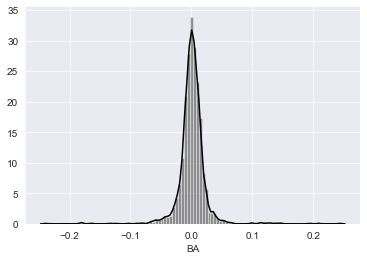

In [97]:
 #the average daily return 
sns.distplot(stocks_returns['BA'].dropna(),bins=100,color='black')

<AxesSubplot:xlabel='PG'>

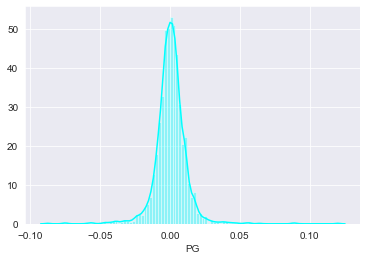

In [98]:
 #the average daily return 
sns.distplot(stocks_returns['PG'].dropna(),bins=100,color='aqua')

<AxesSubplot:xlabel='OPK'>

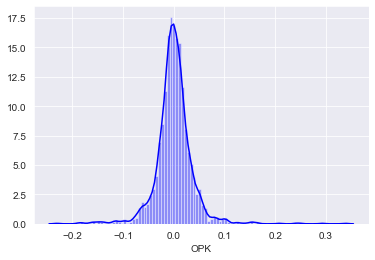

In [99]:
 #the average daily return 
sns.distplot(stocks_returns['OPK'].dropna(),bins=100,color='blue')

<AxesSubplot:xlabel='HD'>

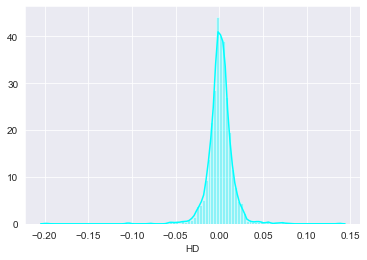

In [101]:
 #the average daily return 
sns.distplot(stocks_returns['HD'].dropna(),bins=100,color='aqua')

<AxesSubplot:xlabel='JPM'>

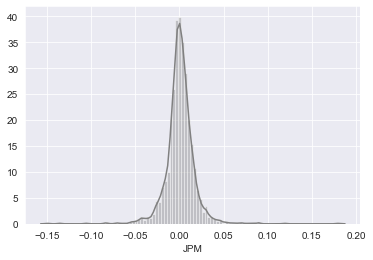

In [102]:
 #the average daily return 
sns.distplot(stocks_returns['JPM'].dropna(),bins=100,color='grey')

<AxesSubplot:xlabel='V'>

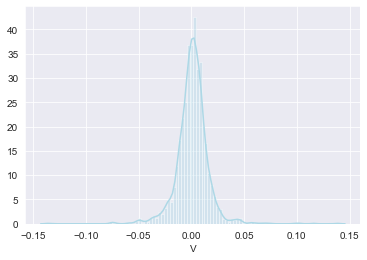

In [103]:
 #the average daily return 
sns.distplot(stocks_returns['V'].dropna(),bins=100,color='lightblue')

<AxesSubplot:xlabel='UNH'>

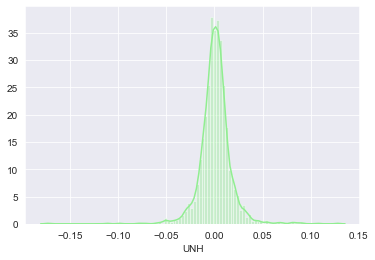

In [104]:
 #the average daily return 
sns.distplot(stocks_returns['UNH'].dropna(),bins=100,color='lightgreen')

## Skewness

Skewness can be used to quantify as a representation of the extent to which a given distribution varies from a normal distribution a shift to the l right or left is said to be skewed. A normal distribution has a skew of zero.

Skewness measures the degree of asymmetry, that is, how much is the given distribution (here, of portfolio returns) more skewed than the Normal distribution. Negative skewness (left-skewed distributions) means  that large negative returns occur more frequently than large positive ones.

In [198]:
pd.concat([stocks_returns.mean(), stocks_returns.median(), stocks_returns.mean()>stocks_returns.median()], axis="columns")

0         1      2
AAPL  0.000941  0.000757   True
AMZN  0.001440  0.001174   True
BA    0.000822  0.001032  False
FB    0.001464  0.001108   True
GE   -0.000224 -0.000367   True
GOOG  0.000892  0.000620   True
HD    0.000979  0.000967   True
J     0.000558  0.000768  False
JPM   0.000724  0.000619   True
MSFT  0.001199  0.000861   True
NFLX  0.002500  0.000633   True
OPK   0.000575  0.000000   True
PG    0.000494  0.000496  False
TSLA  0.002473  0.001262   True
UNH   0.001081  0.001041   True
V     0.001044  0.001504  False

In [ ]:
#from scipy.stats import skew
#skew(stocks_returns)

In [206]:
def fun_skewness(ret):
    demeaned_ret = ret - ret.mean()
    sigma_ret = ret.std(ddof=0)
    exp_ret = (demeaned_ret**3).mean()
    return exp_ret/sigma_ret**3

In [207]:
fun_skewness(stocks_returns).sort_values()

HD     -1.083880
AAPL   -0.276034
UNH    -0.172938
J      -0.091915
MSFT    0.051670
JPM     0.108705
BA      0.204561
GE      0.214226
V       0.229219
AMZN    0.392414
PG      0.456929
TSLA    0.527514
OPK     0.603348
GOOG    0.755042
FB      1.324966
NFLX    2.169489
dtype: float64

## kurtosis

Measures extreme values in either of the tails. Distributions with large kurtosis exhibit tail data exceeding the tails of the Gaussian distribution, meaning that large and small returns occur more frequently.

In [204]:
def fun_kurtosis(ret):
    demeaned_ret = ret - ret.mean()
    sigma_ret = ret.std(ddof=0)
    exp_ret = (demeaned_ret**4).mean()
    return exp_ret/sigma_ret**4

In [205]:
fun_kurtosis(stocks_returns).sort_values()

TSLA     9.667179
J       10.012133
AAPL    10.467946
AMZN    10.873559
GE      13.479757
OPK     14.613387
V       15.245774
MSFT    15.290716
GOOG    16.166043
UNH     17.114378
PG      18.855042
JPM     20.342094
FB      25.489778
HD      30.039330
NFLX    30.615894
BA      32.720309
dtype: float64

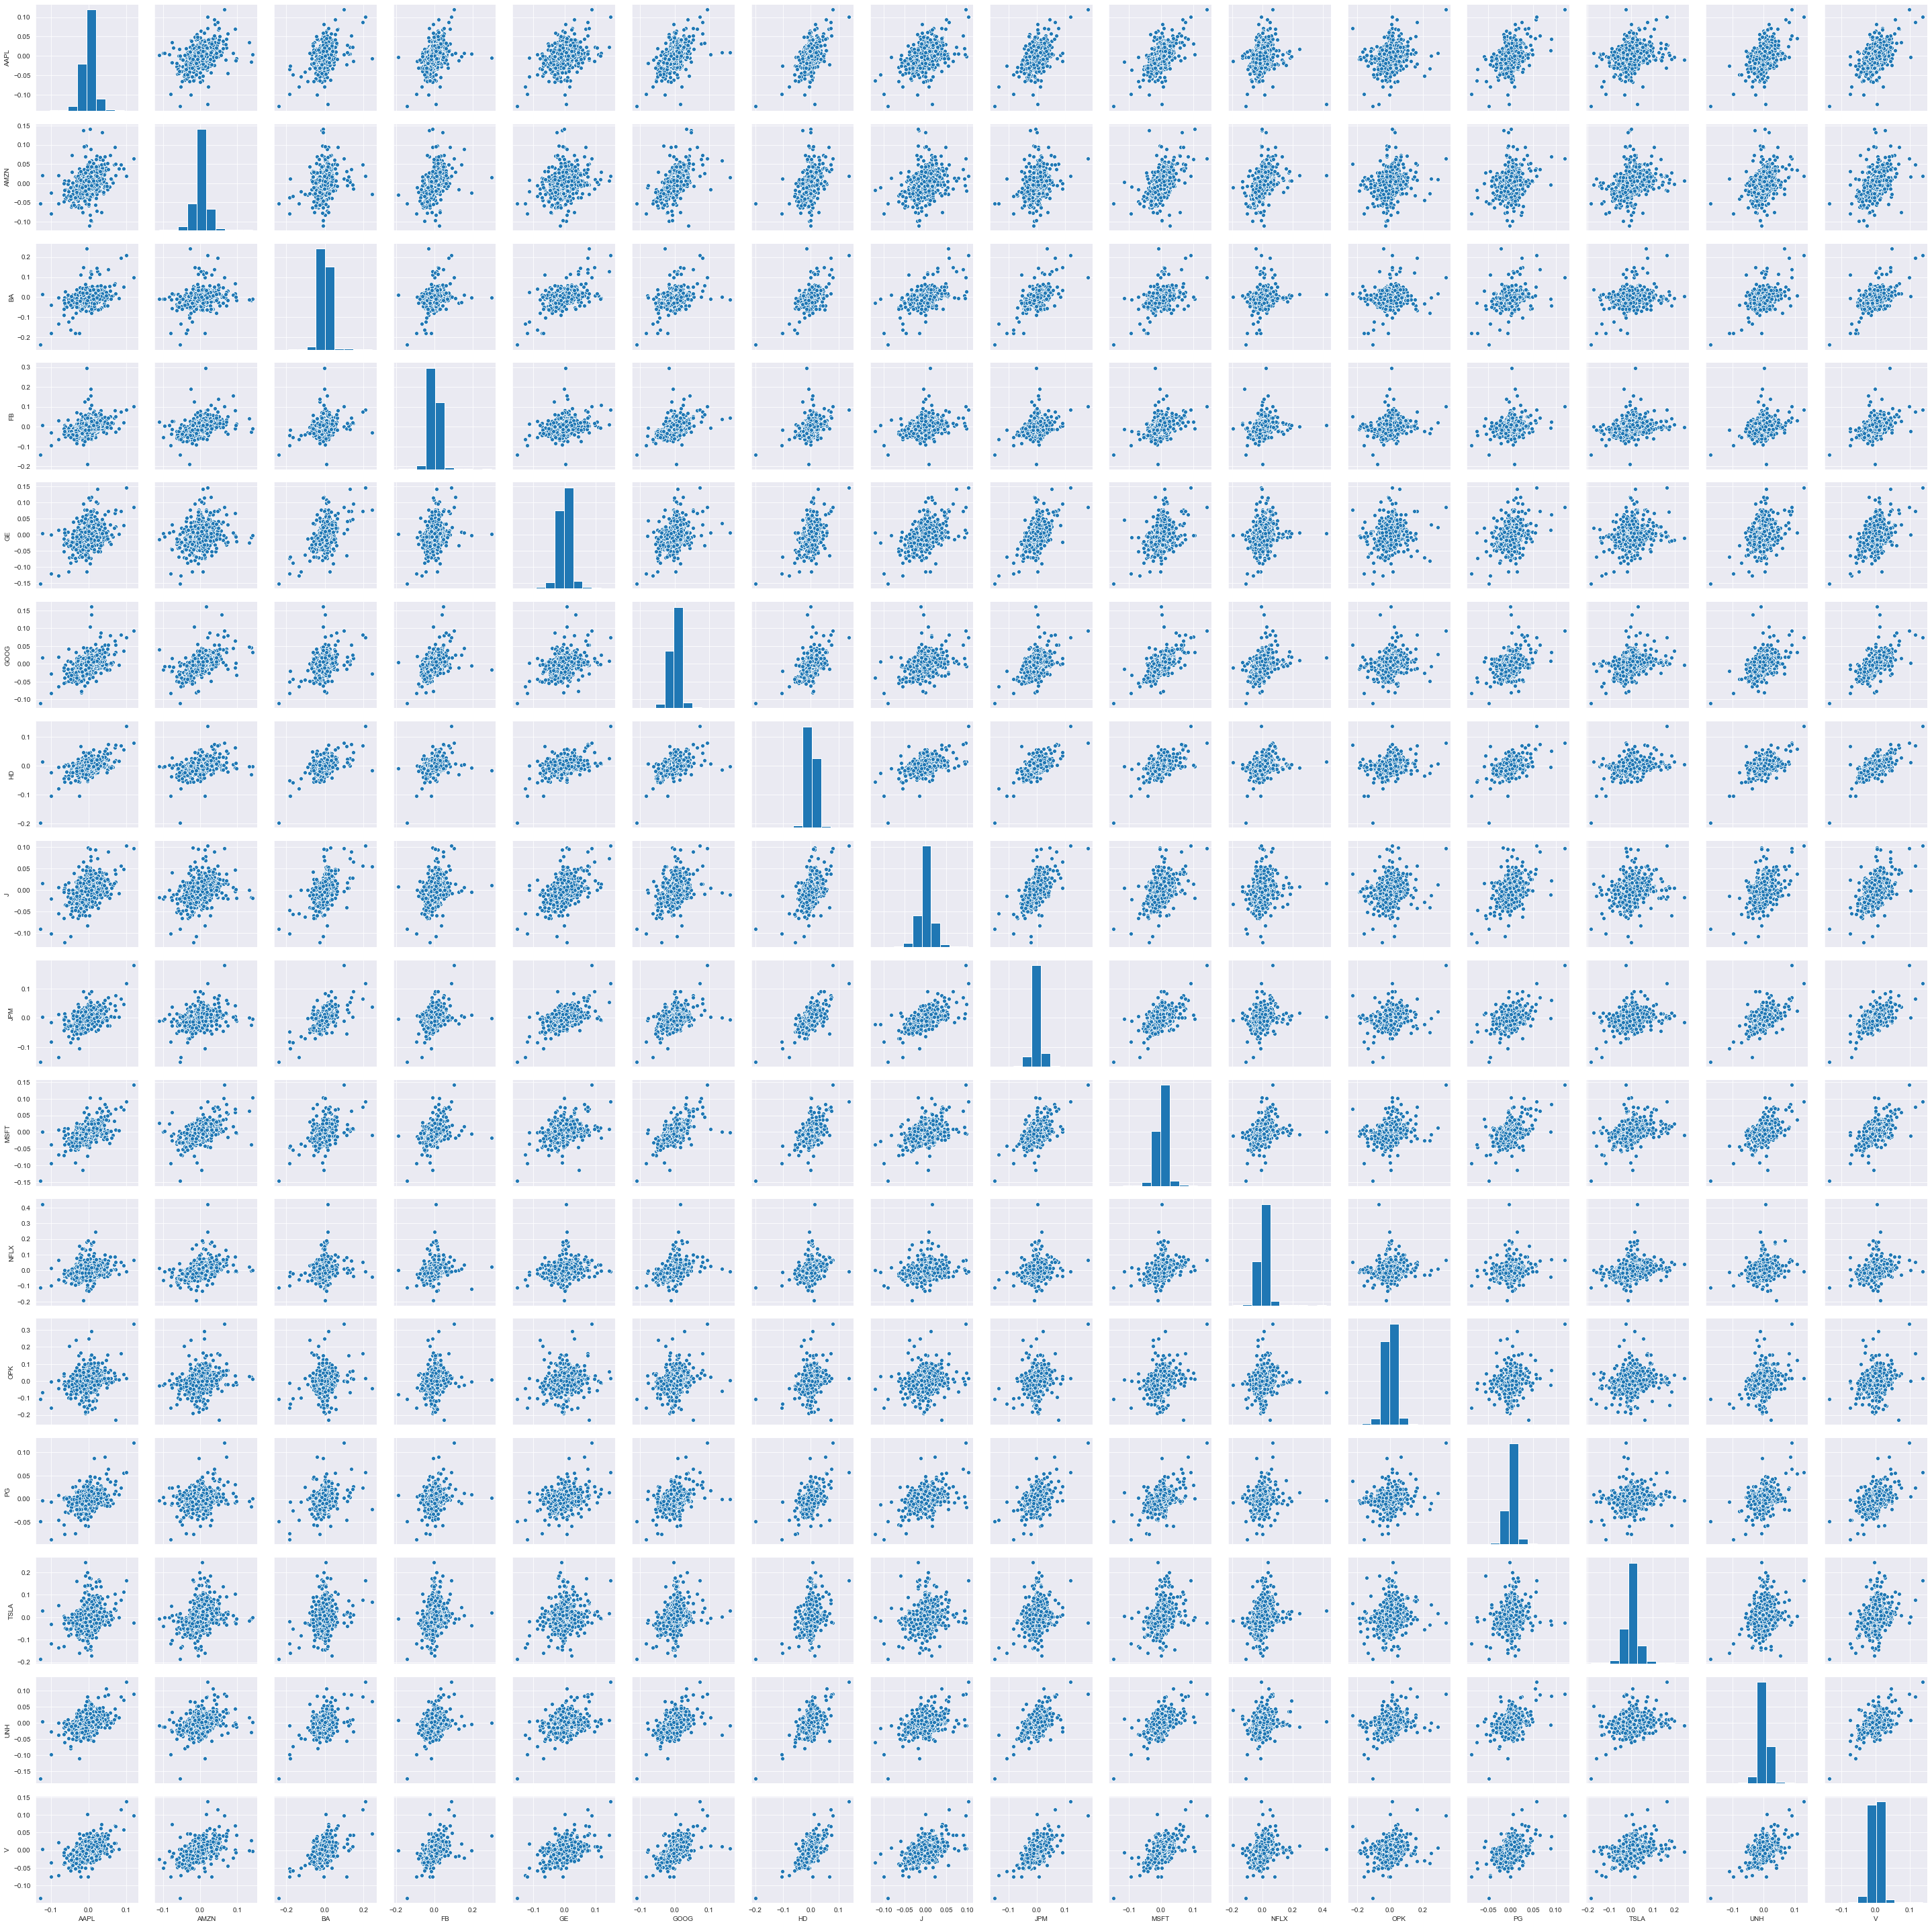

In [108]:
# using pairplot on the DataFrame for  the compariing all
sns.pairplot(stocks_returns.dropna())

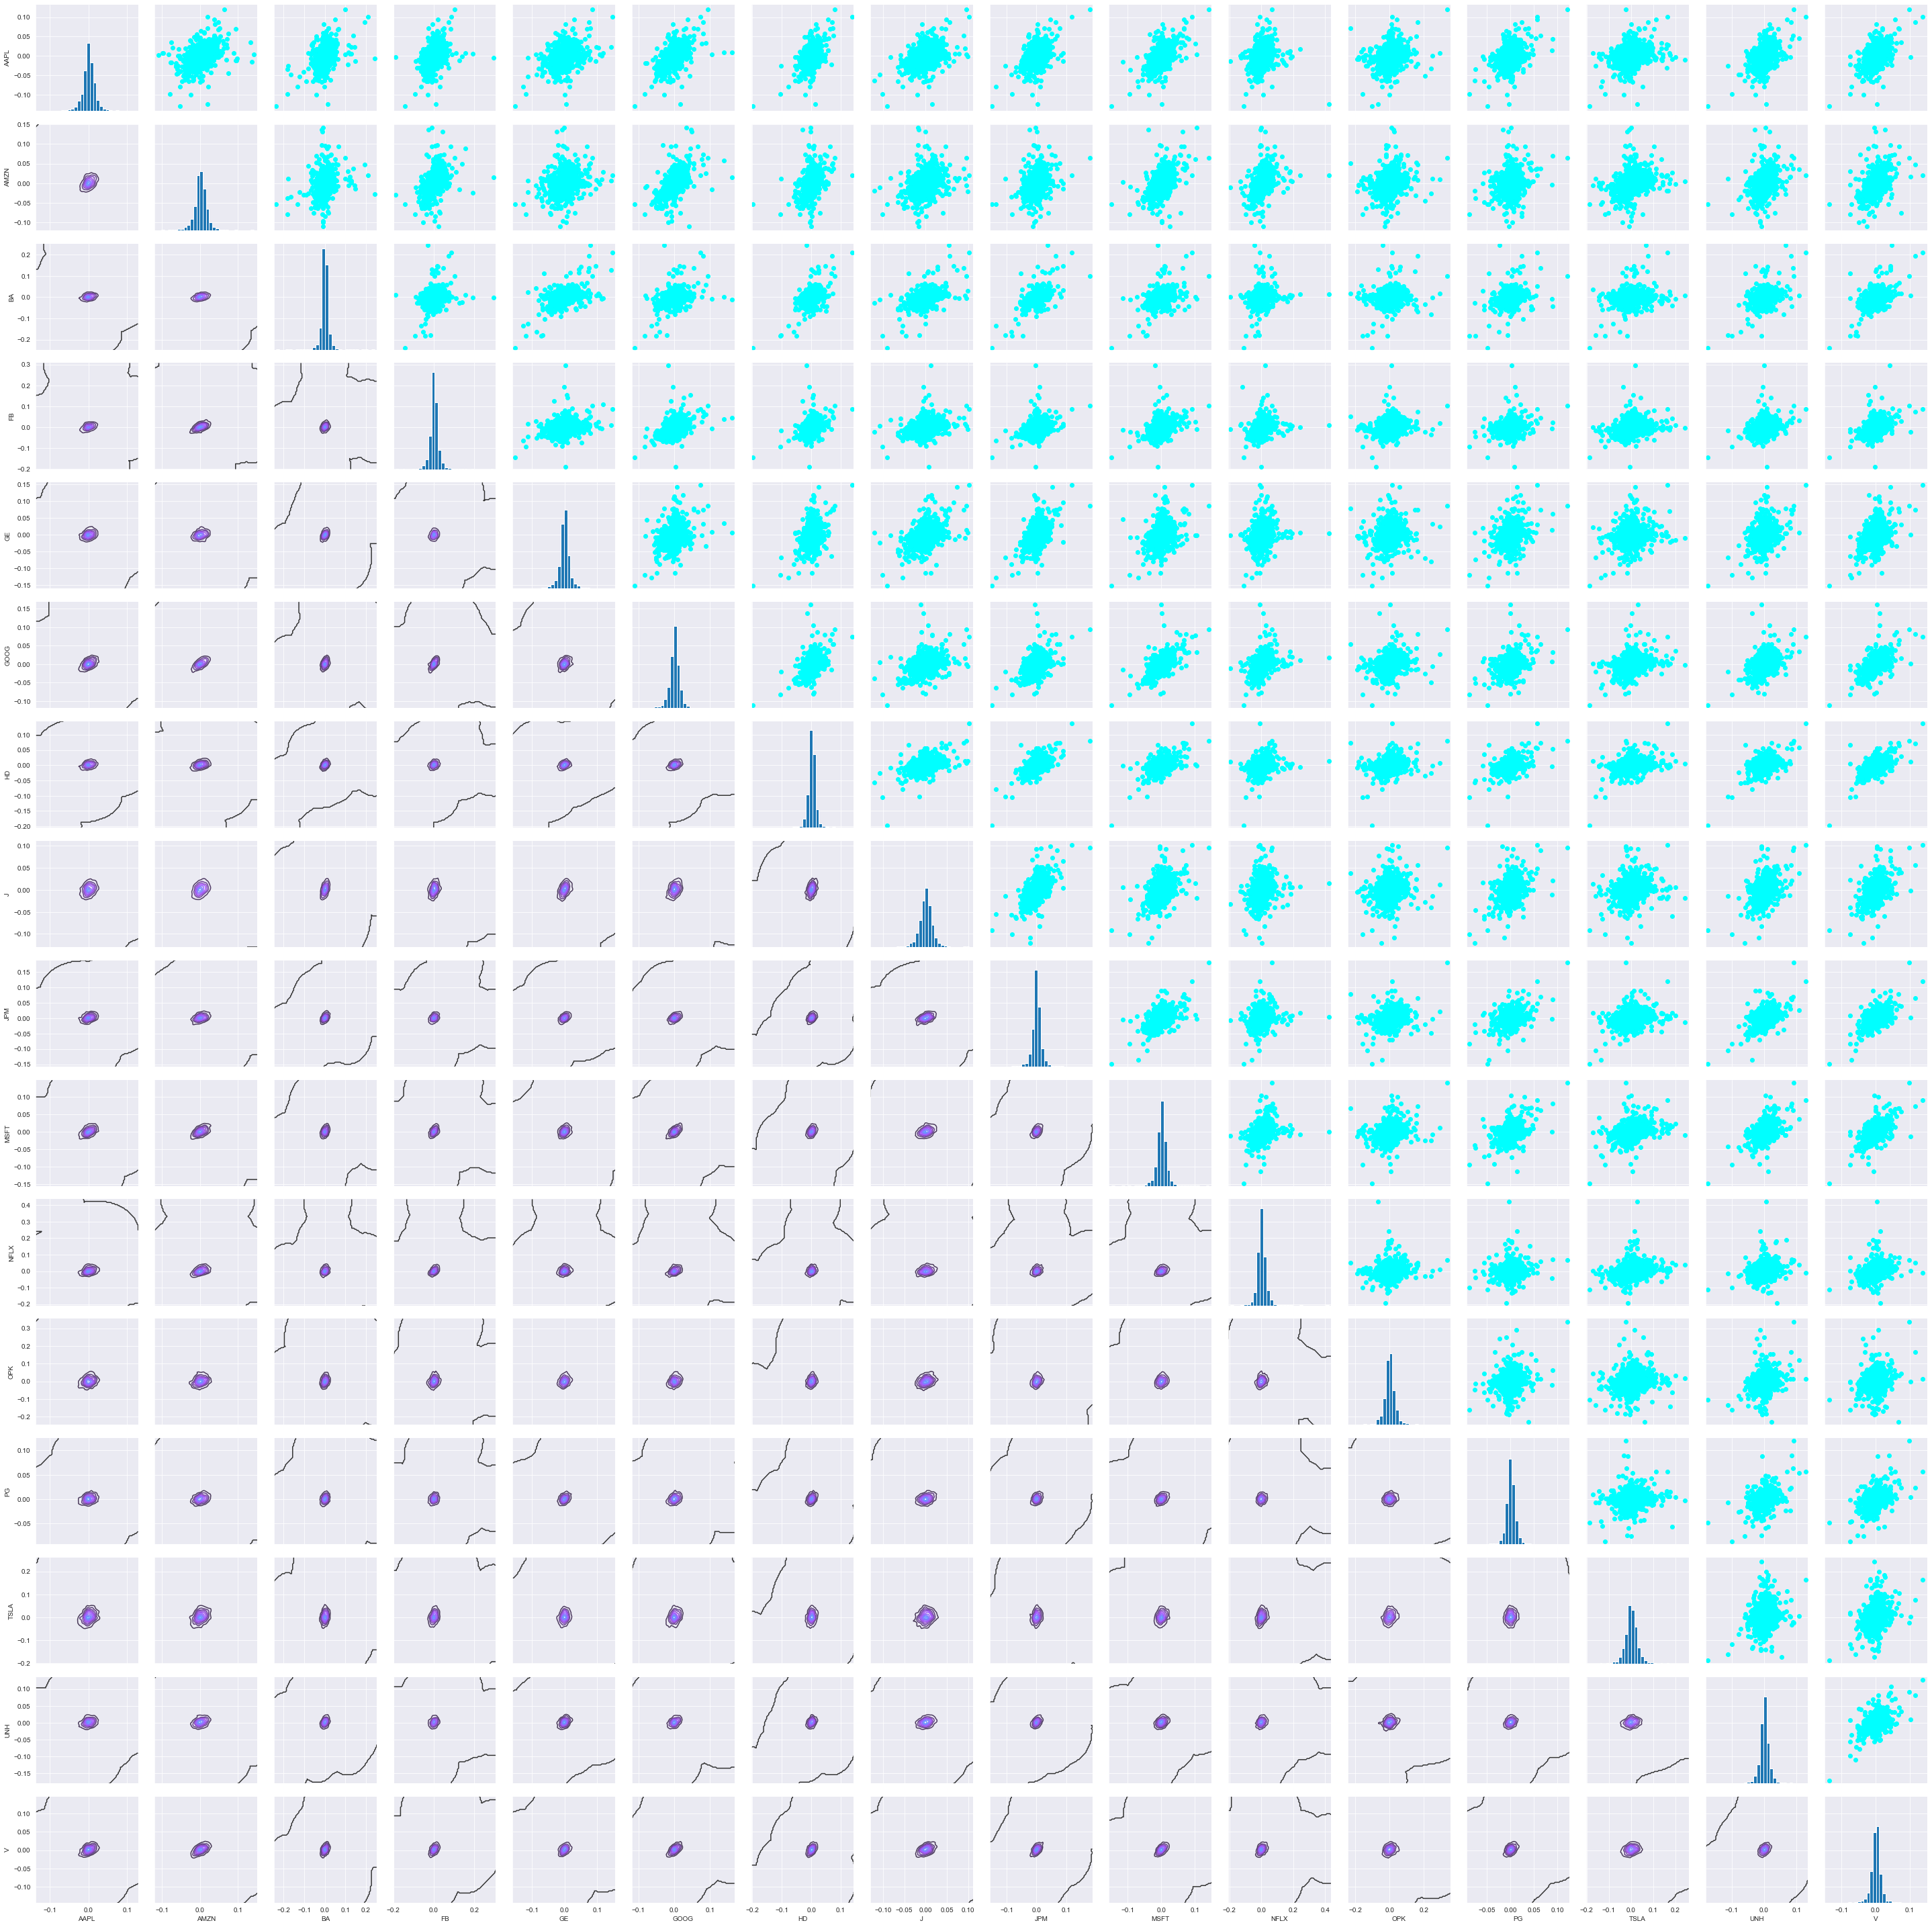

In [109]:
# Setting up the figure by naming it returns_fig and calling PairPLot on the DataFrame
returns_fig = sns.PairGrid(stocks_returns.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='aqua')

#  defining triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

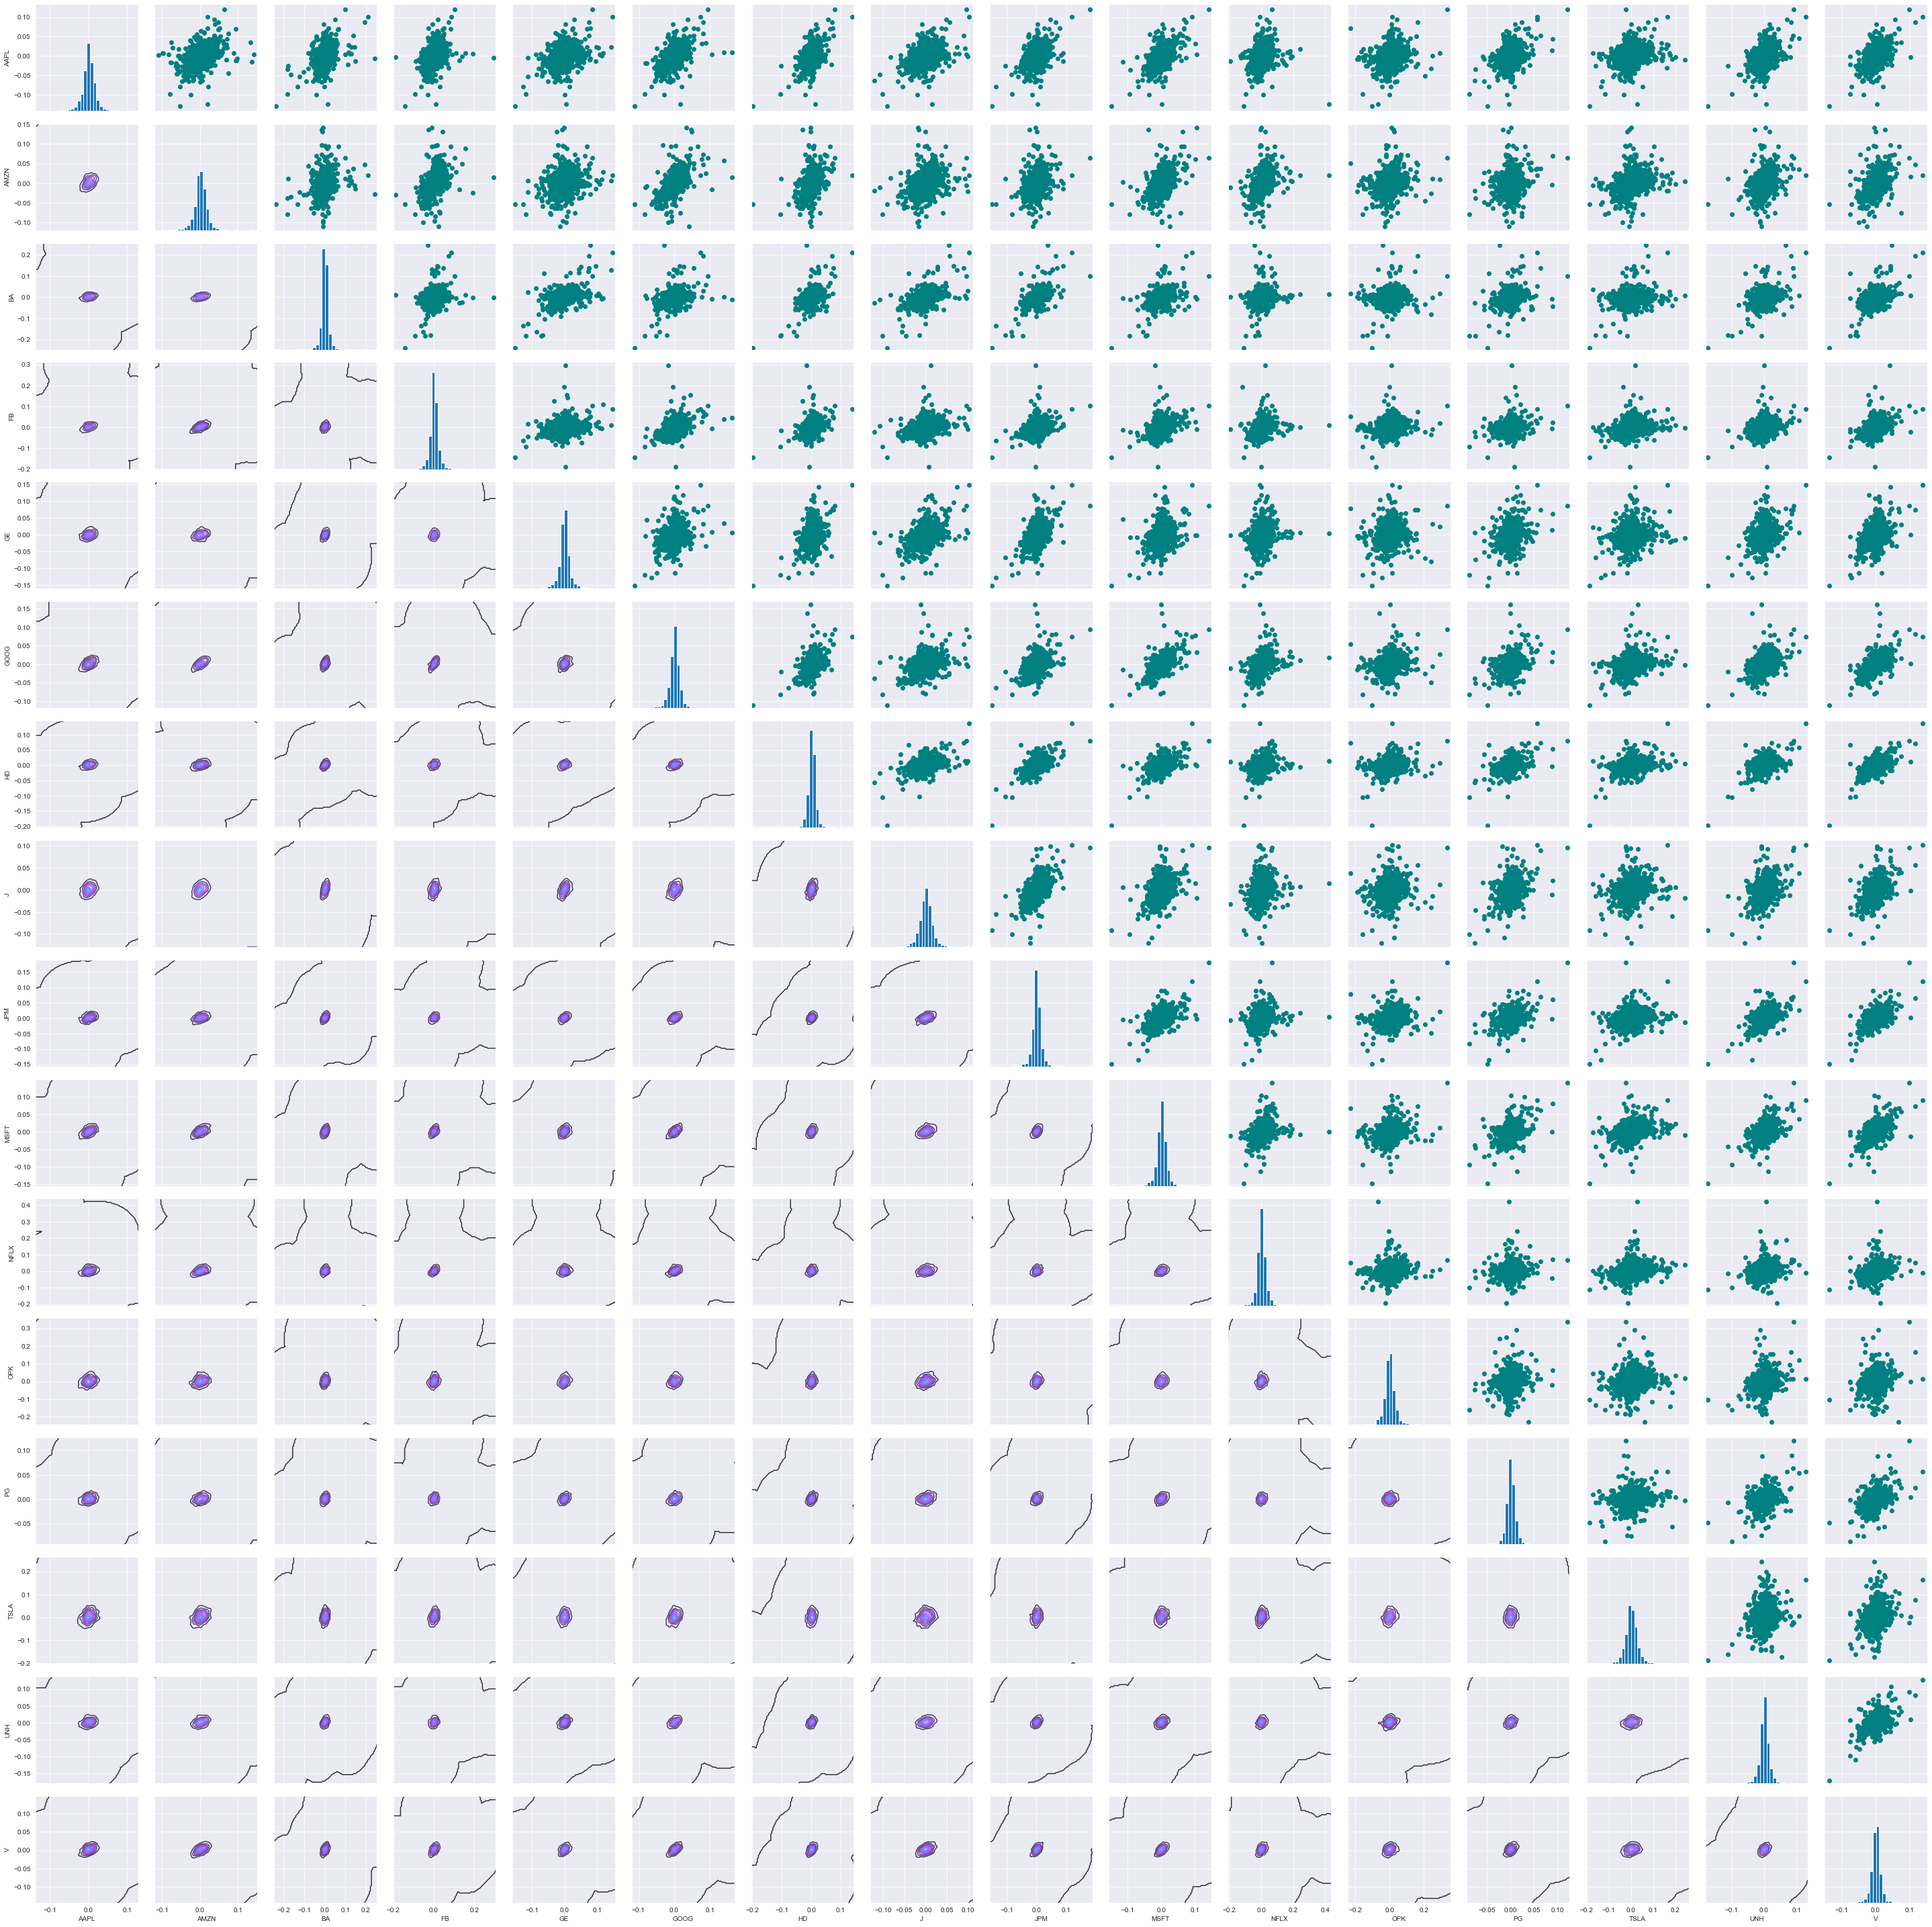

In [110]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(stocks_returns)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='teal')

# defining the lower triangle in the figure, inclufing the plot type (kde) 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# defining the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

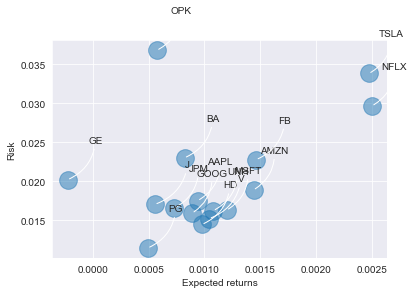

In [111]:
# http://matplotlib.org/users/annotations_guide.html
returns_df = stocks_returns.dropna()

area = np.pi*100

plt.scatter(returns_df.mean(), returns_df.std(),alpha = 0.5,s =area)



#Setting the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
figsize=(16, 14)

for label, x, y in zip(returns_df.columns, returns_df.mean(), returns_df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (35,35),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


# Maximum Drawdown
A metric of the downside risk of a portfolio, it measures the largest peak-to-valley loss (expressed as a percentage) during the course of the investment. The lower the maximum drawdown, the better.

<img src="trough.jpg" style="width:200px;height:200px"/>

In [116]:
def fun_drawdown(rets_series: pd.Series):
    wealthIndex = 1000*(1+rets_series).cumprod()
    previousPeaks = wealthIndex.cummax()
    drawdowns = (wealthIndex - previousPeaks)/previousPeaks
    return pd.DataFrame({"Wealth Index": wealthIndex, 
                         "Previous Peak": previousPeaks, 
                         "Max Drawdown": drawdowns})

In [117]:
fun_drawdown(stocks_returns["FB"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1039.355141    1039.355141      0.000000
2012-08-07    982.456101    1039.355141     -0.054745
2012-08-08    982.456101    1039.355141     -0.054745

In [122]:
fun_drawdown(stocks_returns["FB"]).min()

Wealth Index      840.682760
Previous Peak    1039.355141
Max Drawdown       -0.429609
dtype: float64

In [123]:
fun_drawdown(stocks_returns["FB"]).idxmin()

Wealth Index     2012-09-04
Previous Peak    2012-08-06
Max Drawdown     2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

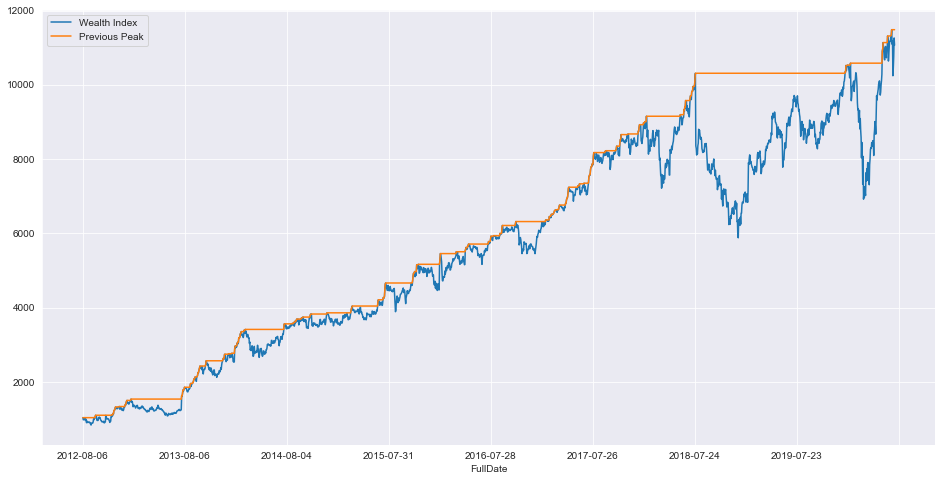

In [127]:
fun_drawdown(stocks_returns["FB"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [128]:
fun_drawdown(stocks_returns["AAPL"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1011.052583    1011.052583      0.000000
2012-08-07   1008.421045    1011.052583     -0.002603
2012-08-08   1006.842061    1011.052583     -0.004164

In [129]:
fun_drawdown(stocks_returns["AAPL"]).min()

Wealth Index      643.684186
Previous Peak    1011.052583
Max Drawdown       -0.437960
dtype: float64

In [130]:
fun_drawdown(stocks_returns["AAPL"]).idxmin()

Wealth Index     2013-04-19
Previous Peak    2012-08-06
Max Drawdown     2013-04-19
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

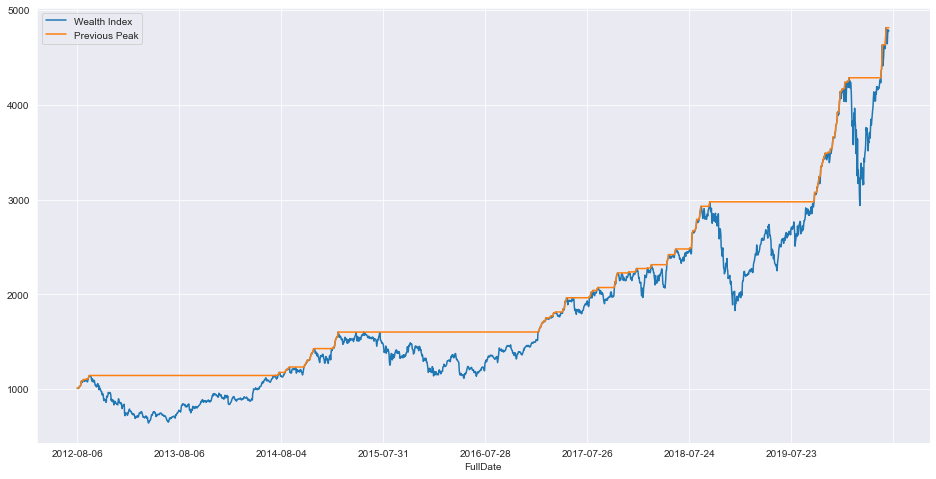

In [133]:
fun_drawdown(stocks_returns["AAPL"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [134]:
fun_drawdown(stocks_returns["AMZN"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06    995.829273     995.829273      0.000000
2012-08-07   1006.766806    1006.766806      0.000000
2012-08-08    997.489057    1006.766806     -0.009215

In [135]:
fun_drawdown(stocks_returns["AMZN"]).min()

Wealth Index     938.843278
Previous Peak    995.829273
Max Drawdown      -0.341038
dtype: float64

In [136]:
fun_drawdown(stocks_returns["AMZN"]).idxmin()

Wealth Index     2012-11-15
Previous Peak    2012-08-06
Max Drawdown     2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

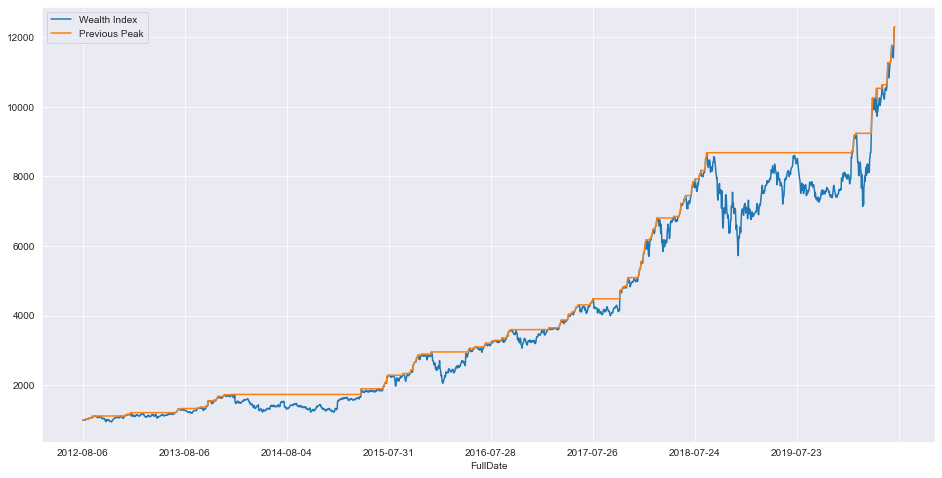

In [138]:
fun_drawdown(stocks_returns["AMZN"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [139]:
fun_drawdown(stocks_returns["GOOG"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1002.316306    1002.316306      0.000000
2012-08-07    998.747945    1002.316306     -0.003560
2012-08-08   1001.408621    1002.316306     -0.000906

In [140]:
fun_drawdown(stocks_returns["GOOG"]).min()

Wealth Index      998.747945
Previous Peak    1002.316306
Max Drawdown       -0.307901
dtype: float64

In [141]:
fun_drawdown(stocks_returns["GOOG"]).idxmin()

Wealth Index     2012-08-07
Previous Peak    2012-08-06
Max Drawdown     2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

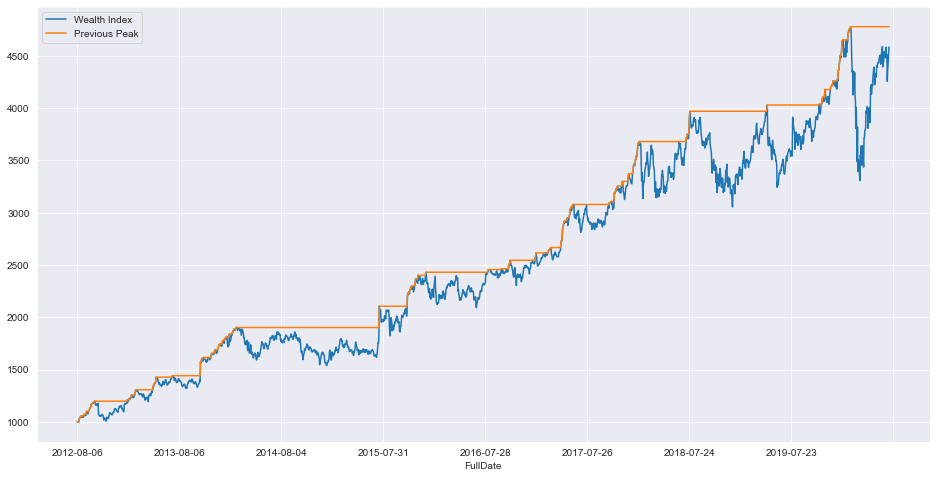

In [142]:
fun_drawdown(stocks_returns["GOOG"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [143]:
fun_drawdown(stocks_returns["NFLX"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1053.246735    1053.246735      0.000000
2012-08-07   1074.026060    1074.026060      0.000000
2012-08-08   1072.727329    1074.026060     -0.001209

In [144]:
fun_drawdown(stocks_returns["NFLX"]).min()

Wealth Index      998.701331
Previous Peak    1053.246735
Max Drawdown       -0.441774
dtype: float64

In [145]:
fun_drawdown(stocks_returns["NFLX"]).idxmin()

Wealth Index     2012-09-25
Previous Peak    2012-08-06
Max Drawdown     2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

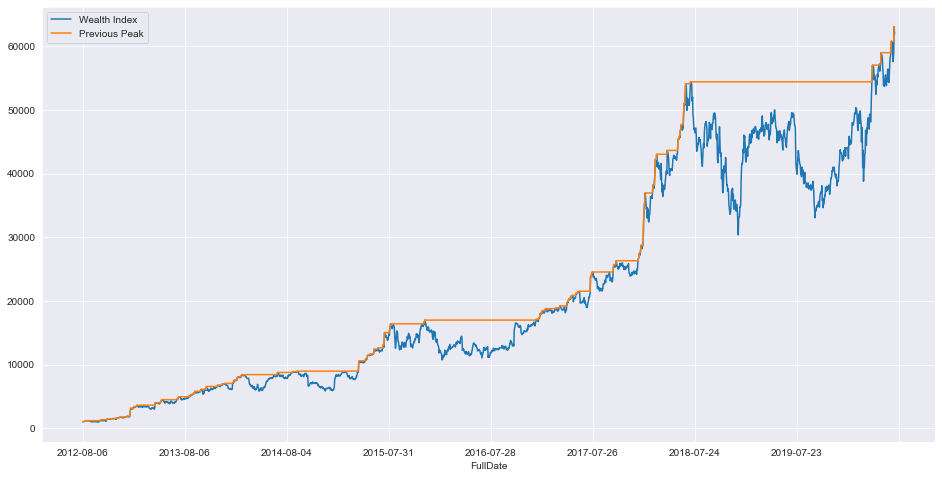

In [146]:
fun_drawdown(stocks_returns["NFLX"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [147]:
fun_drawdown(stocks_returns["MSFT"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1006.485604    1006.485604           0.0
2012-08-07   1017.024729    1017.024729           0.0
2012-08-08   1019.456812    1019.456812           0.0

In [148]:
fun_drawdown(stocks_returns["MSFT"]).min()

Wealth Index      899.473063
Previous Peak    1006.485604
Max Drawdown       -0.280380
dtype: float64

In [149]:
fun_drawdown(stocks_returns["MSFT"]).idxmin()

Wealth Index     2012-12-04
Previous Peak    2012-08-06
Max Drawdown     2020-03-16
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

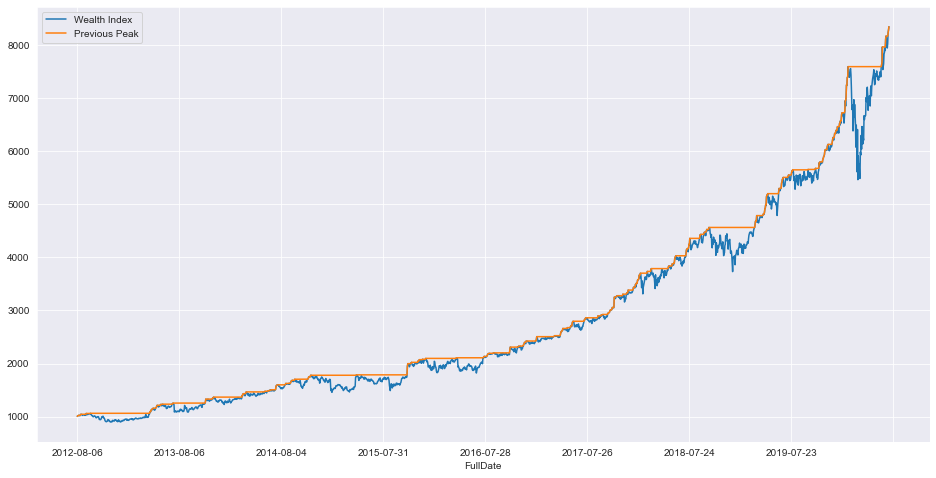

In [150]:
fun_drawdown(stocks_returns["MSFT"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [151]:
fun_drawdown(stocks_returns["GE"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1000.625405    1000.625405      0.000000
2012-08-07   1007.504743    1007.504743      0.000000
2012-08-08   1002.501621    1007.504743     -0.004966

In [152]:
fun_drawdown(stocks_returns["GE"]).min()

Wealth Index      342.714202
Previous Peak    1000.625405
Max Drawdown       -0.808993
dtype: float64

In [153]:
fun_drawdown(stocks_returns["GE"]).idxmin()

Wealth Index     2020-05-15
Previous Peak    2012-08-06
Max Drawdown     2020-05-15
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

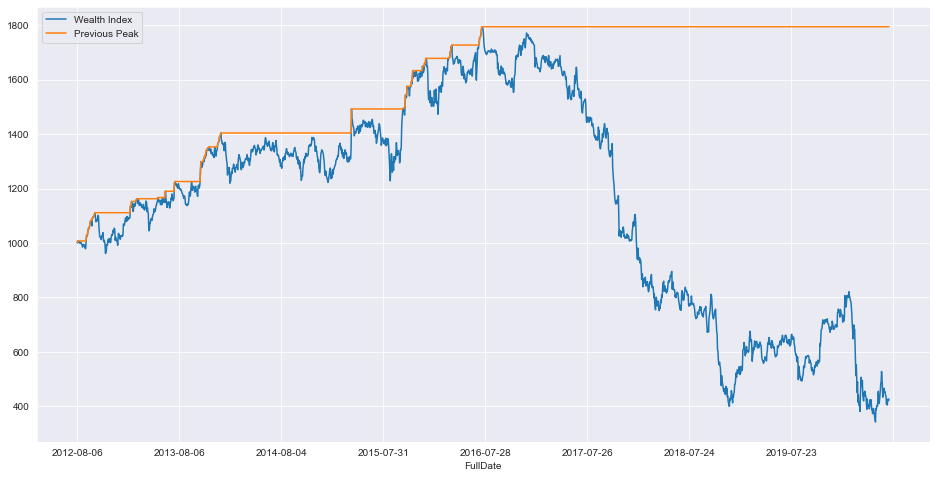

In [154]:
fun_drawdown(stocks_returns["GE"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [155]:
fun_drawdown(stocks_returns["J"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1009.032948    1009.032948      0.000000
2012-08-07   1008.501586    1009.032948     -0.000527
2012-08-08   1015.674818    1015.674818      0.000000

In [156]:
fun_drawdown(stocks_returns["J"]).min()

Wealth Index      899.309220
Previous Peak    1009.032948
Max Drawdown       -0.475194
dtype: float64

In [157]:
fun_drawdown(stocks_returns["J"]).idxmin()

Wealth Index     2016-02-11
Previous Peak    2012-08-06
Max Drawdown     2016-02-11
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

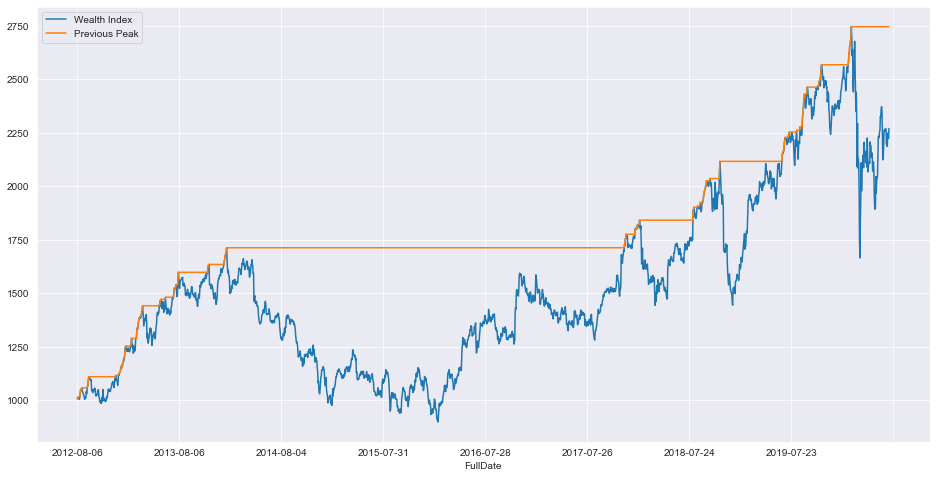

In [158]:
fun_drawdown(stocks_returns["J"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [159]:
fun_drawdown(stocks_returns["TSLA"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1036.697301    1036.697301      0.000000
2012-08-07   1110.091817    1110.091817      0.000000
2012-08-08   1067.889977    1110.091817     -0.038017

In [160]:
fun_drawdown(stocks_returns["TSLA"]).min()

Wealth Index     1003.669721
Previous Peak    1036.697301
Max Drawdown       -0.606279
dtype: float64

In [161]:
fun_drawdown(stocks_returns["TSLA"]).idxmin()

Wealth Index     2012-10-15
Previous Peak    2012-08-06
Max Drawdown     2020-03-18
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

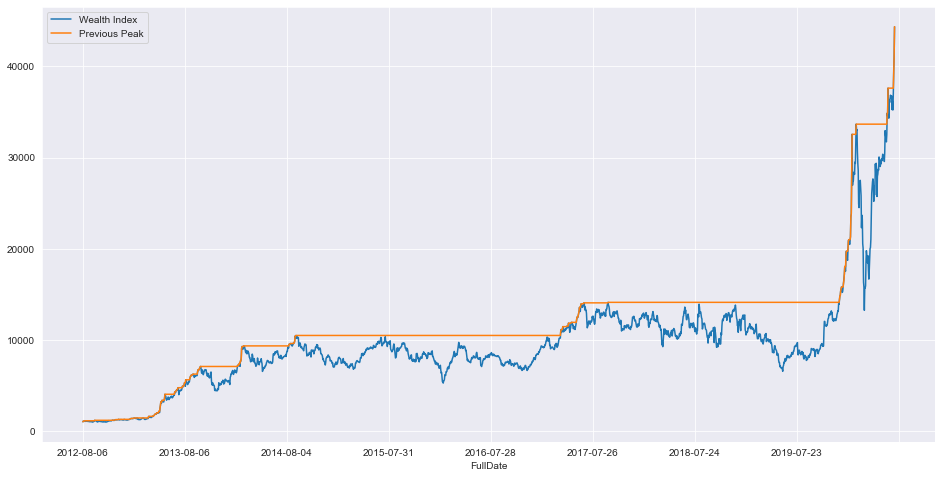

In [162]:
fun_drawdown(stocks_returns["TSLA"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [163]:
fun_drawdown(stocks_returns["BA"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1001.003032    1001.003032           0.0
2012-08-07   1022.567678    1022.567678           0.0
2012-08-08   1024.573742    1024.573742           0.0

In [164]:
fun_drawdown(stocks_returns["BA"]).min()

Wealth Index      958.542301
Previous Peak    1001.003032
Max Drawdown       -0.779201
dtype: float64

In [165]:
fun_drawdown(stocks_returns["BA"]).idxmin()

Wealth Index     2012-09-25
Previous Peak    2012-08-06
Max Drawdown     2020-03-20
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

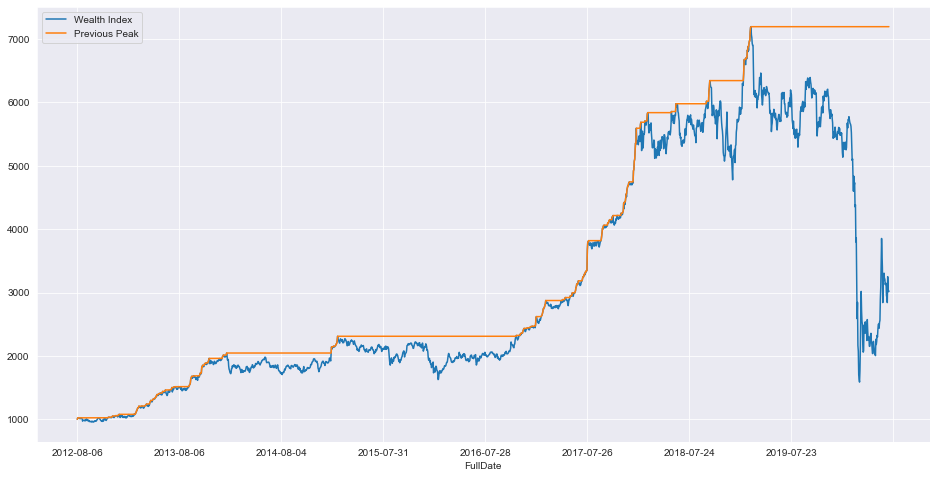

In [166]:
fun_drawdown(stocks_returns["BA"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [167]:
fun_drawdown(stocks_returns["PG"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1004.688449    1004.688449           0.0
2012-08-07   1010.939664    1010.939664           0.0
2012-08-08   1018.558328    1018.558328           0.0

In [168]:
fun_drawdown(stocks_returns["PG"]).min()

Wealth Index     1004.688449
Previous Peak    1004.688449
Max Drawdown       -0.254564
dtype: float64

In [169]:
fun_drawdown(stocks_returns["PG"]).idxmin()

Wealth Index     2012-08-06
Previous Peak    2012-08-06
Max Drawdown     2015-09-14
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

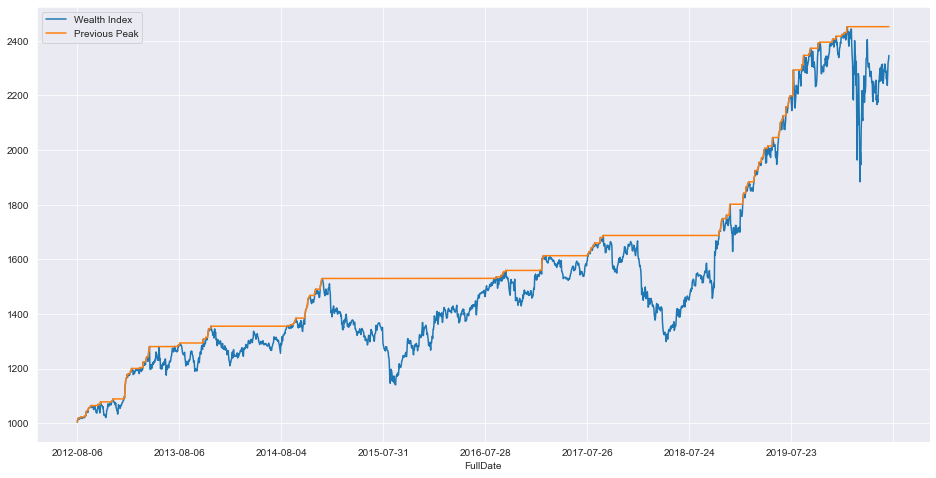

In [170]:
fun_drawdown(stocks_returns["PG"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [171]:
fun_drawdown(stocks_returns["OPK"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06    995.338000        995.338      0.000000
2012-08-07    995.338000        995.338      0.000000
2012-08-08    993.007055        995.338     -0.002342

In [172]:
fun_drawdown(stocks_returns["OPK"]).min()

Wealth Index     268.065265
Previous Peak    995.338000
Max Drawdown      -0.939854
dtype: float64

In [173]:
fun_drawdown(stocks_returns["OPK"]).idxmin()

Wealth Index     2020-04-02
Previous Peak    2012-08-06
Max Drawdown     2020-04-02
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

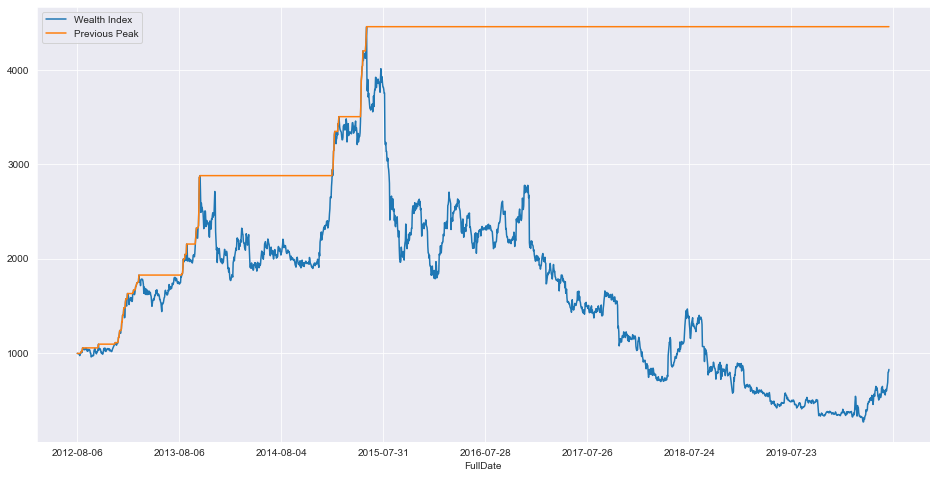

In [174]:
fun_drawdown(stocks_returns["OPK"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [175]:
fun_drawdown(stocks_returns["HD"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06    994.491672     994.491672           0.0
2012-08-07   1002.065645    1002.065645           0.0
2012-08-08   1009.639706    1009.639706           0.0

In [176]:
fun_drawdown(stocks_returns["HD"]).min()

Wealth Index     994.491672
Previous Peak    994.491672
Max Drawdown      -0.379946
dtype: float64

In [177]:
fun_drawdown(stocks_returns["HD"]).idxmin()

Wealth Index     2012-08-06
Previous Peak    2012-08-06
Max Drawdown     2020-03-20
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

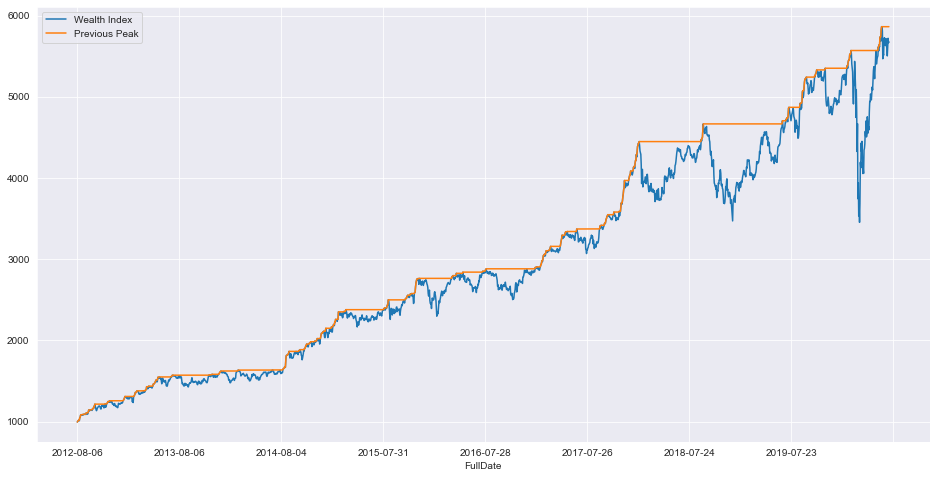

In [178]:
fun_drawdown(stocks_returns["HD"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [180]:
fun_drawdown(stocks_returns["JPM"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1005.553622    1005.553622           0.0
2012-08-07   1025.338475    1025.338475           0.0
2012-08-08   1029.503658    1029.503658           0.0

In [181]:
fun_drawdown(stocks_returns["JPM"]).min()

Wealth Index     1005.553622
Previous Peak    1005.553622
Max Drawdown       -0.436286
dtype: float64

In [182]:
fun_drawdown(stocks_returns["JPM"]).idxmin()

Wealth Index     2012-08-06
Previous Peak    2012-08-06
Max Drawdown     2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

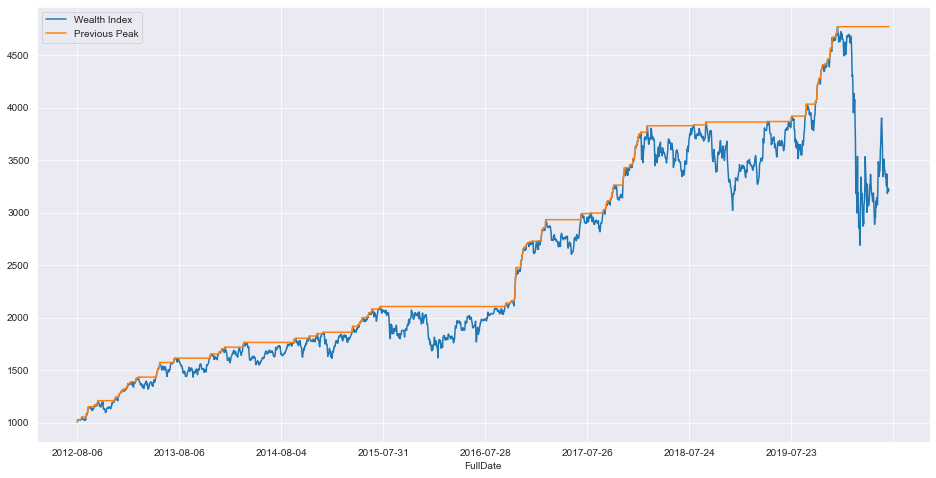

In [183]:
fun_drawdown(stocks_returns["JPM"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [185]:
fun_drawdown(stocks_returns["V"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06   1000.324472    1000.324472      0.000000
2012-08-07    995.457515    1000.324472     -0.004865
2012-08-08   1001.297888    1001.297888      0.000000

In [186]:
fun_drawdown(stocks_returns["V"]).min()

Wealth Index      968.526953
Previous Peak    1000.324472
Max Drawdown       -0.363636
dtype: float64

In [187]:
fun_drawdown(stocks_returns["V"]).idxmin()

Wealth Index     2012-08-24
Previous Peak    2012-08-06
Max Drawdown     2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

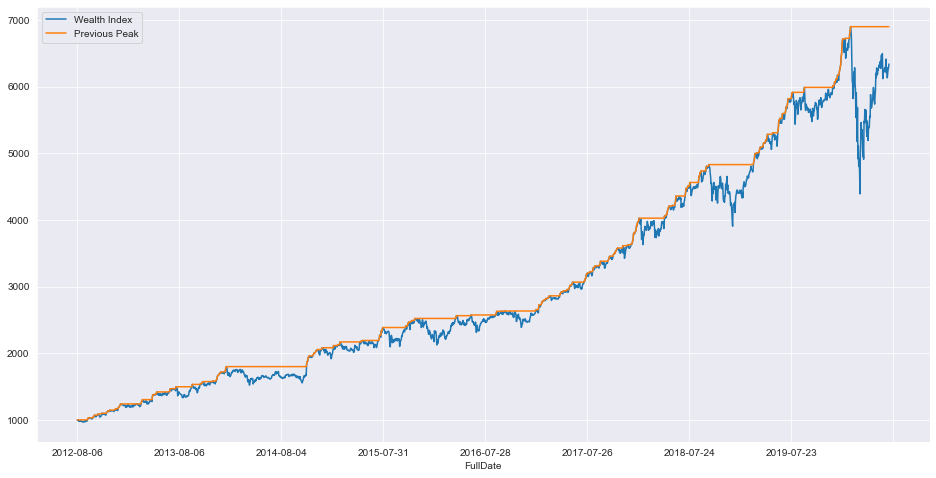

In [189]:
fun_drawdown(stocks_returns["V"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))

In [190]:
fun_drawdown(stocks_returns["UNH"]).head(3)

Wealth Index  Previous Peak  Max Drawdown
FullDate                                             
2012-08-06    988.235321     988.235321           0.0
2012-08-07   1017.980053    1017.980053           0.0
2012-08-08   1021.753597    1021.753597           0.0

In [191]:
fun_drawdown(stocks_returns["UNH"]).min()

Wealth Index     988.235321
Previous Peak    988.235321
Max Drawdown      -0.358998
dtype: float64

In [192]:
fun_drawdown(stocks_returns["UNH"]).idxmin()

Wealth Index     2012-08-06
Previous Peak    2012-08-06
Max Drawdown     2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

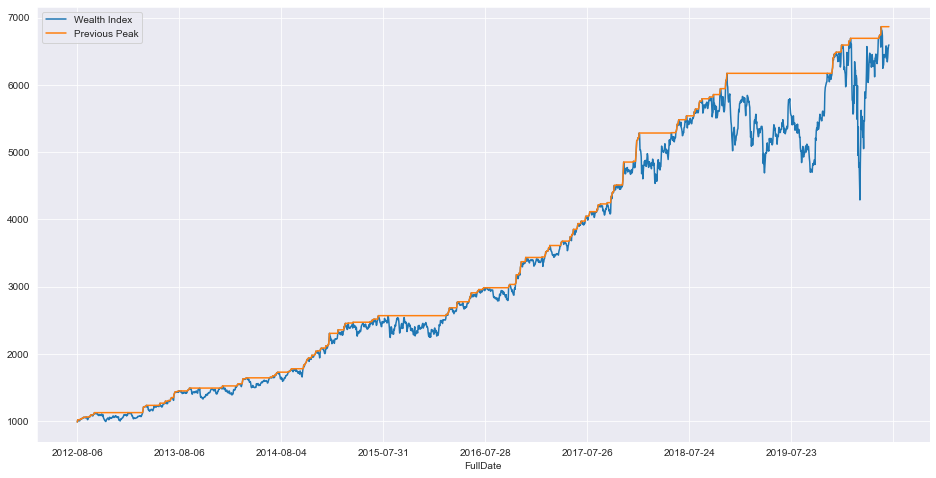

In [196]:
fun_drawdown(stocks_returns["UNH"])[["Wealth Index","Previous Peak"]].plot(figsize=(16,8))